In [ ]:
pip install pandas
pip install seaborn
pip install -U matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from   matplotlib import colors
import seaborn as sns

import json

In [11]:
base_path='/Users/hangyeongmin/Downloads/arc-prize-2025/'

def load_json(file_path):
    with open(file_path) as f:
        data = json.load(f)
    return data

In [12]:
training_challenges   = load_json(base_path +'arc-agi_training_challenges.json')
training_solutions    = load_json(base_path +'arc-agi_training_solutions.json')

evaluation_challenges = load_json(base_path +'arc-agi_evaluation_challenges.json')
evaluation_solutions  = load_json(base_path +'arc-agi_evaluation_solutions.json')

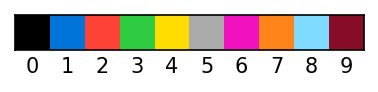

In [13]:
# 0:black, 1:blue, 2:red, 3:green, 4:yellow, # 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown

cmap = colors.ListedColormap(
    ['#000000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)

plt.figure(figsize=(3, 1), dpi=150)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.tick_params(axis='x', color='r', length=0, grid_color='none')
    
plt.show()

In [18]:
def plot_task(task, task_solutions, i, t, size=2.5, w1=0.9):
    t=list(training_challenges)[i]
    titleSize=16    
    num_train = len(task['train'])
    num_test  = len(task['test'])
    
    wn=num_train+num_test
    fig, axs  = plt.subplots(2, wn, figsize=(size*wn,2*size))
    plt.suptitle(f'Task #{i}, {t}', fontsize=titleSize, fontweight='bold', y=1, color = '#eeeeee')
   
    '''train:'''
    for j in range(num_train):     
        plot_one(axs[0, j], j,task, 'train', 'input',  w=w1)
        plot_one(axs[1, j], j,task, 'train', 'output', w=w1)
    
    '''test:'''
    for k in range(num_test):
        plot_one(axs[0, j+k+1], k, task, 'test', 'input', w=w1)
        task['test'][k]['output'] = task_solutions[k]
        plot_one(axs[1, j+k+1], k, task, 'test', 'output', w=w1)
    
    axs[1, j+1].set_xticklabels([])
    axs[1, j+1].set_yticklabels([])
    axs[1, j+1] = plt.figure(1).add_subplot(111)
    axs[1, j+1].set_xlim([0, wn])
    
    '''Separators:'''
    colorSeparator = 'white'
    for m in range(1, wn):
        axs[1, j+1].plot([m,m],[0,1],'--', linewidth=1, color = colorSeparator)
    axs[1, j+1].plot([num_train,num_train],[0,1],'-', linewidth=3, color = colorSeparator)

    axs[1, j+1].axis("off")

    '''Frame and background:'''
    fig.patch.set_linewidth(5) #widthframe
    fig.patch.set_edgecolor('black') #colorframe
    fig.patch.set_facecolor('#444444') #background
   
    plt.tight_layout()
    
    print(f'#{i}, {t}') # for fast and convinience search
    plt.show()  
   
def plot_one(ax, i, task, train_or_test, input_or_output, solution=None, w=0.8):
    fs=12
    input_matrix = task[train_or_test][i][input_or_output]
    ax.imshow(input_matrix, cmap=cmap, norm=norm)
    
    #ax.grid(True, which = 'both',color = 'lightgrey', linewidth = 1.0)
    plt.setp(plt.gcf().get_axes(), xticklabels=[], yticklabels=[])
    ax.set_xticks([x-0.5 for x in range(1 + len(input_matrix[0]))])
    ax.set_yticks([x-0.5 for x in range(1 + len(input_matrix))])
    
    '''Grid:'''
    ax.grid(visible= True, which = 'both', color = '#666666', linewidth = w)
    
    ax.tick_params(axis='both', color='none', length=0)
   
    '''sub title:'''
    ax.set_title(train_or_test + ' ' + input_or_output, fontsize=fs, color = '#dddddd')


#0, 00576224


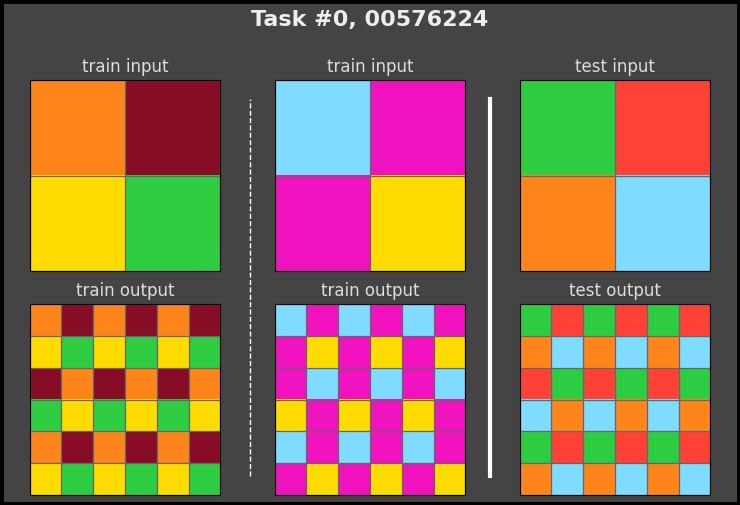

#1, 007bbfb7


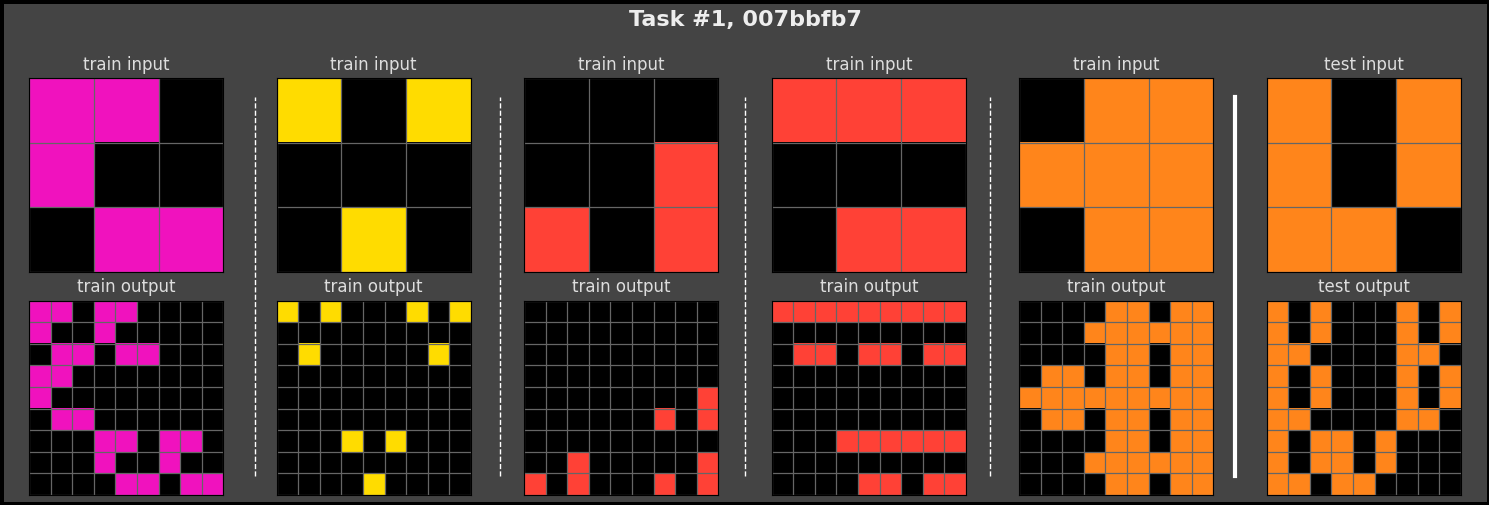

#2, 009d5c81


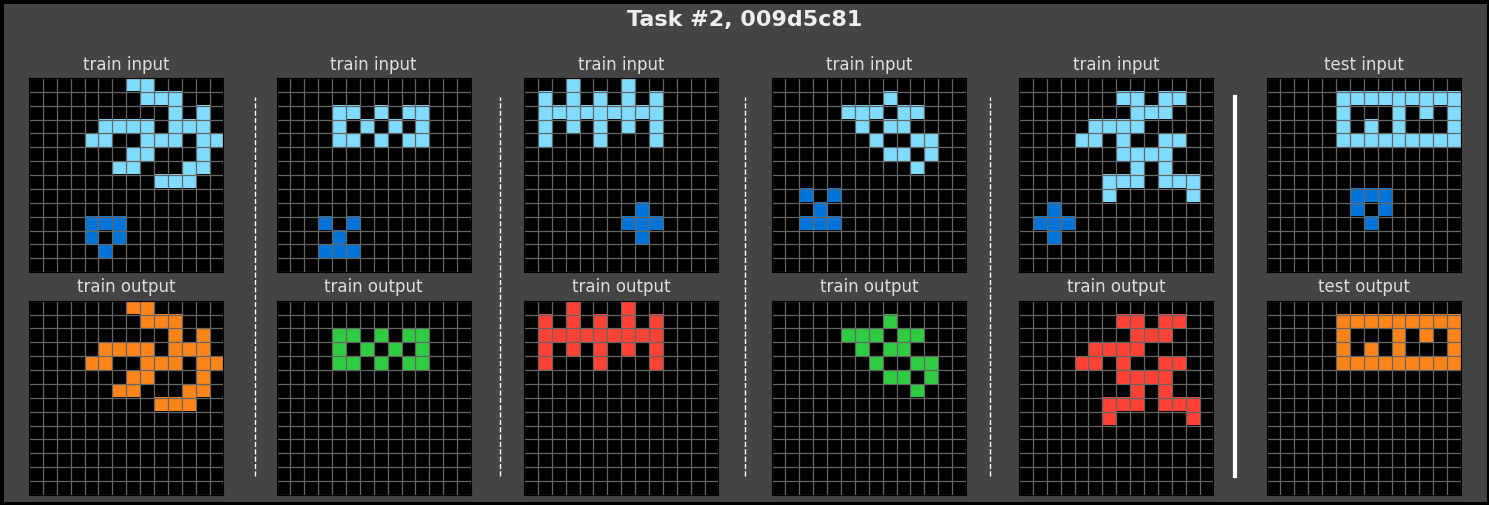

#3, 00d62c1b


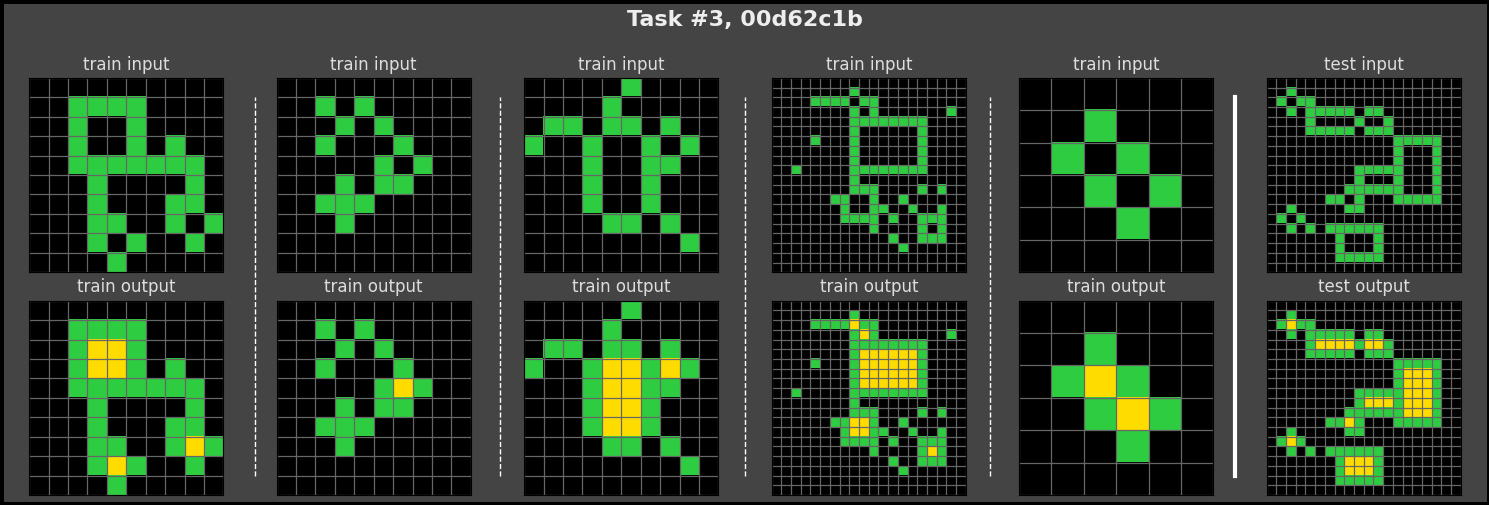

#4, 00dbd492


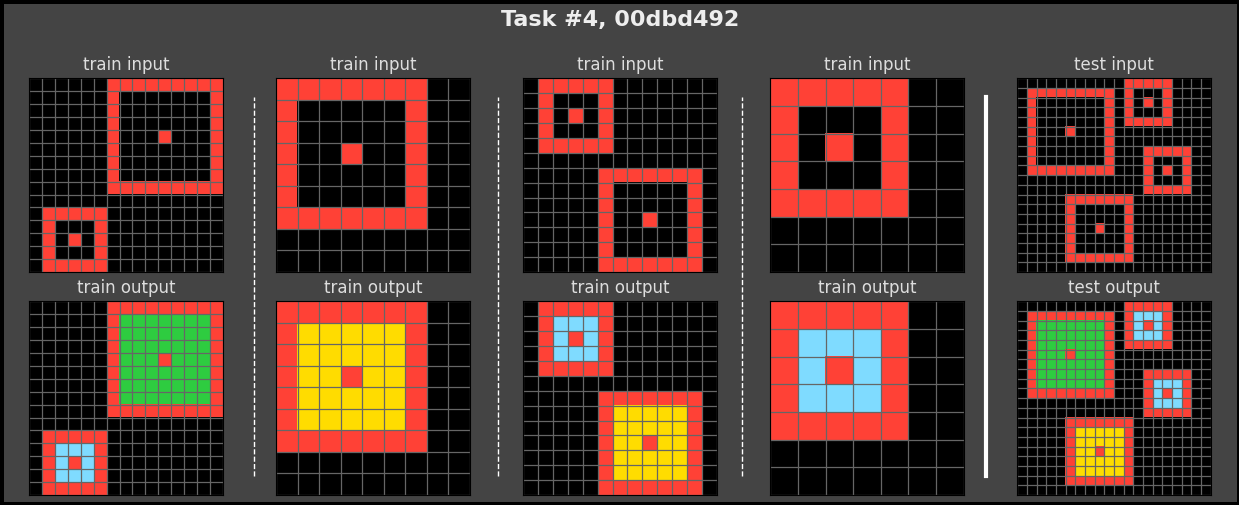

#5, 017c7c7b


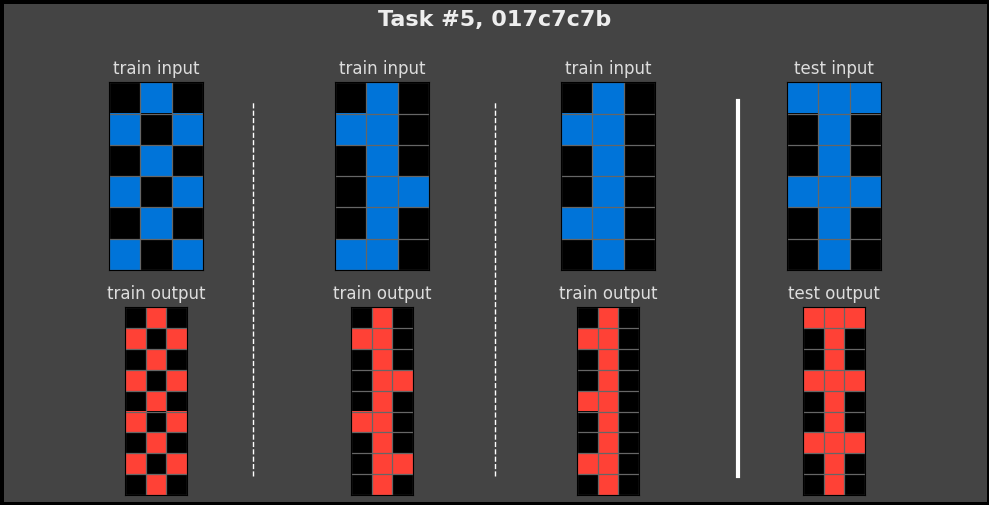

#6, 025d127b


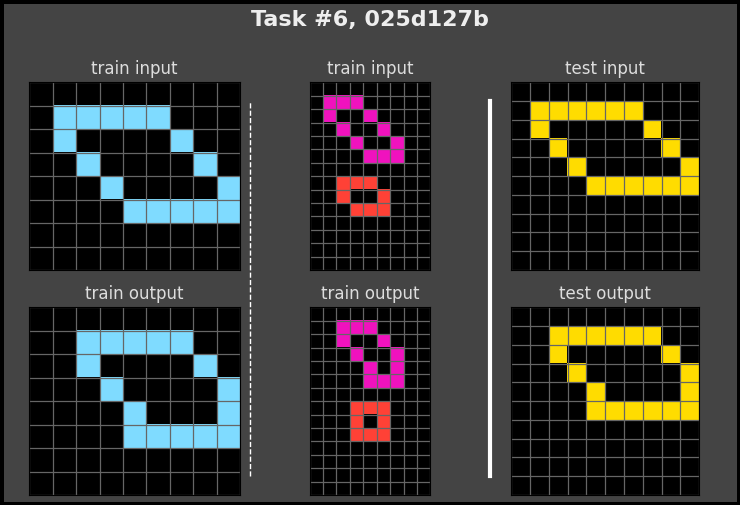

#7, 03560426


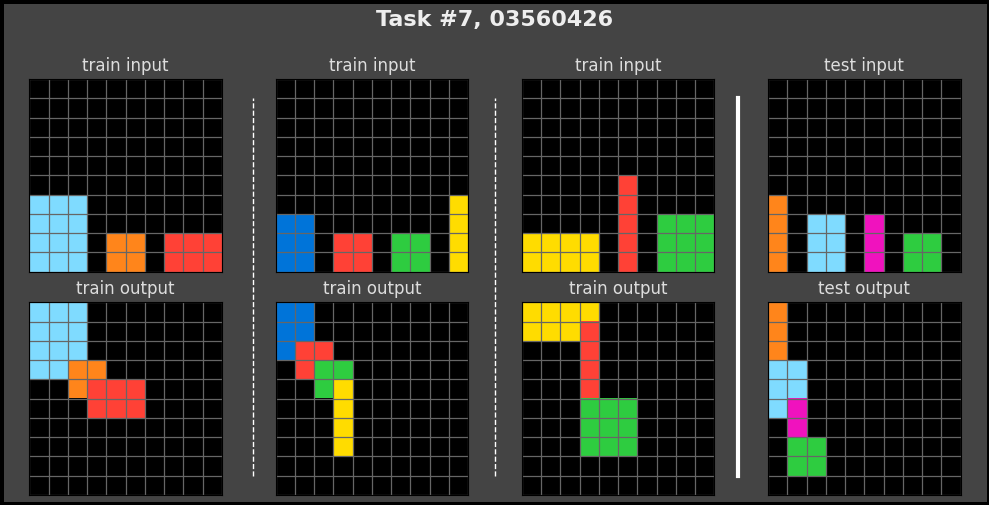

#8, 045e512c


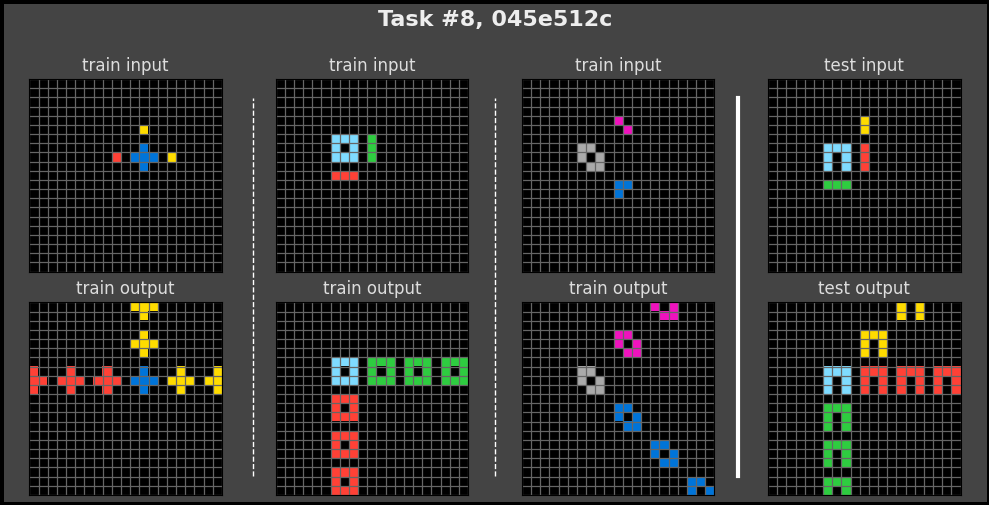

#9, 0520fde7


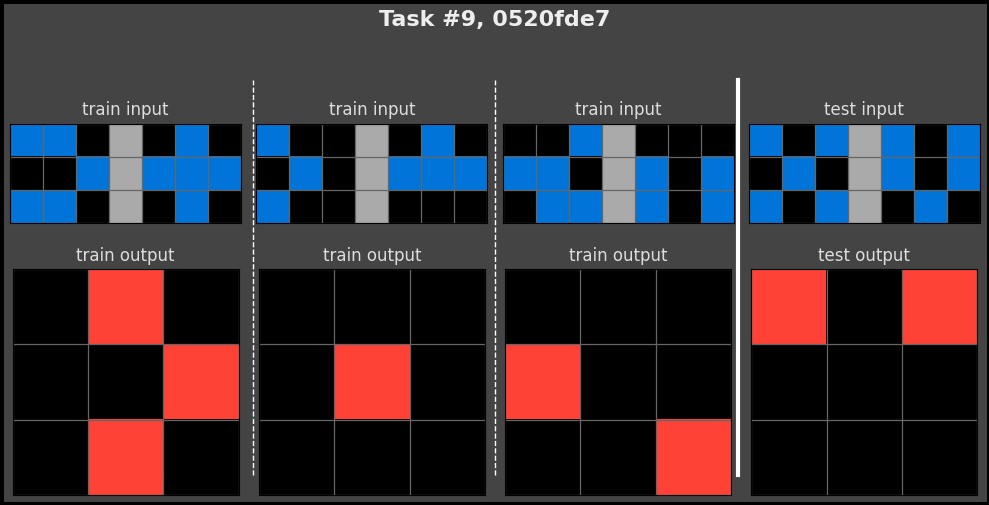

#10, 05269061


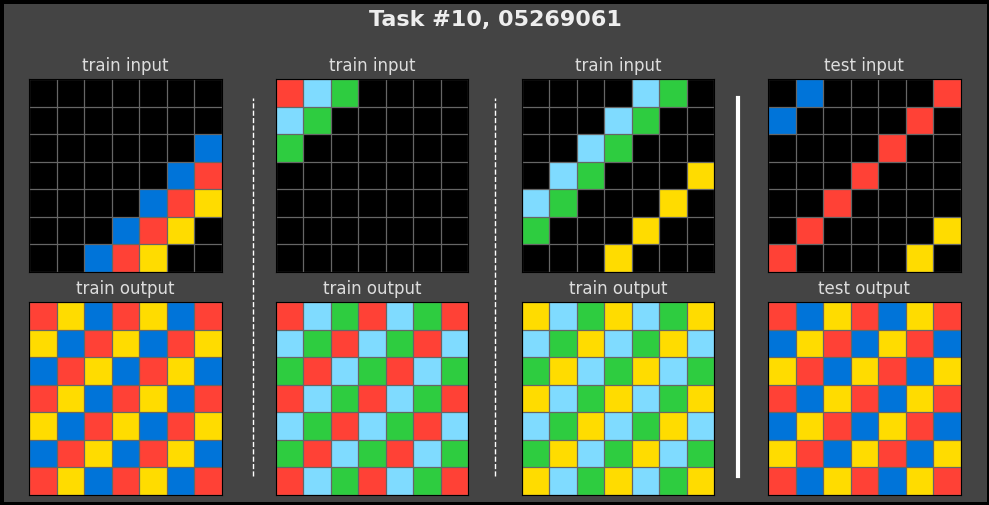

#11, 05a7bcf2


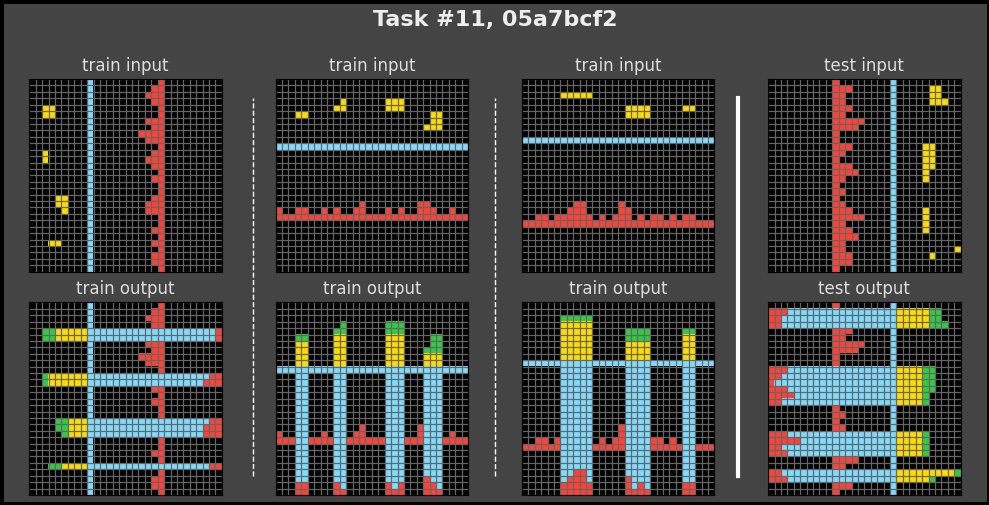

#12, 05f2a901


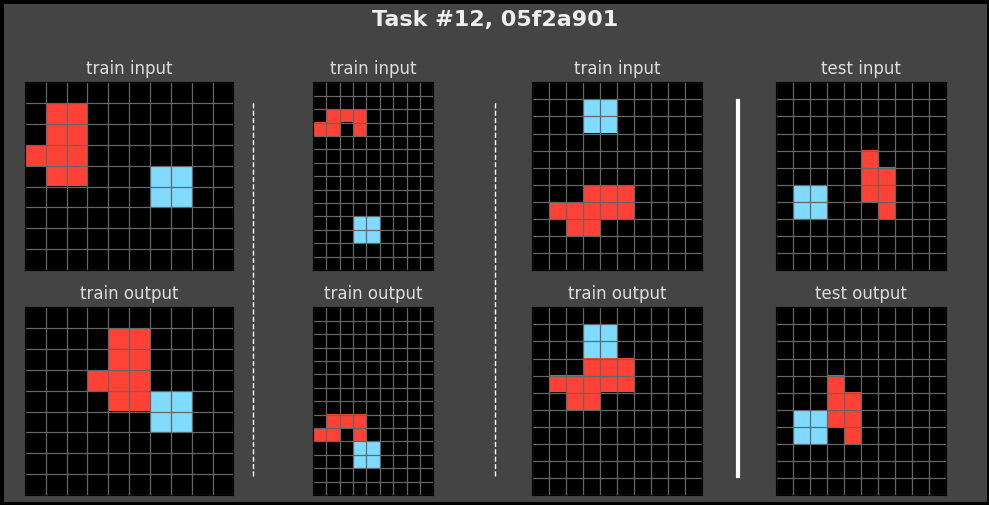

#13, 0607ce86


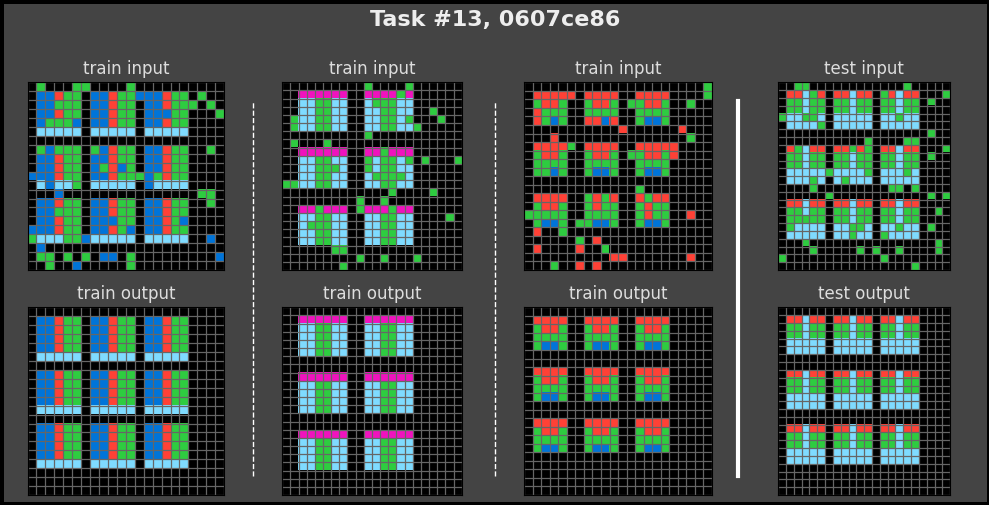

#14, 0692e18c


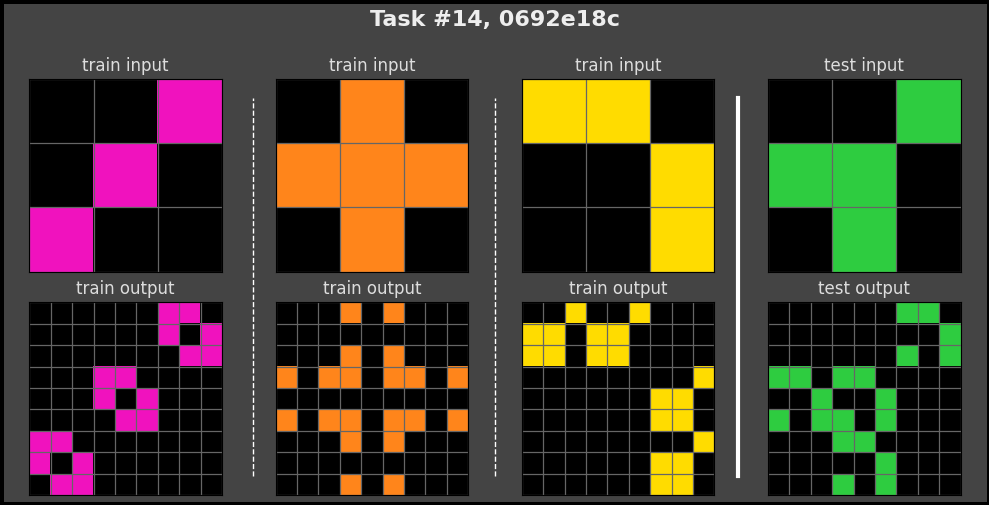

#15, 06df4c85


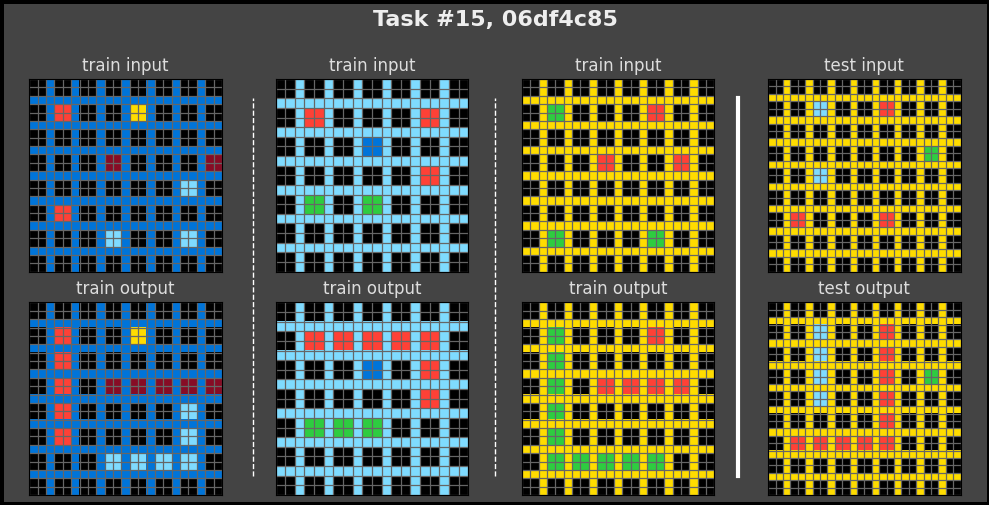

#16, 070dd51e


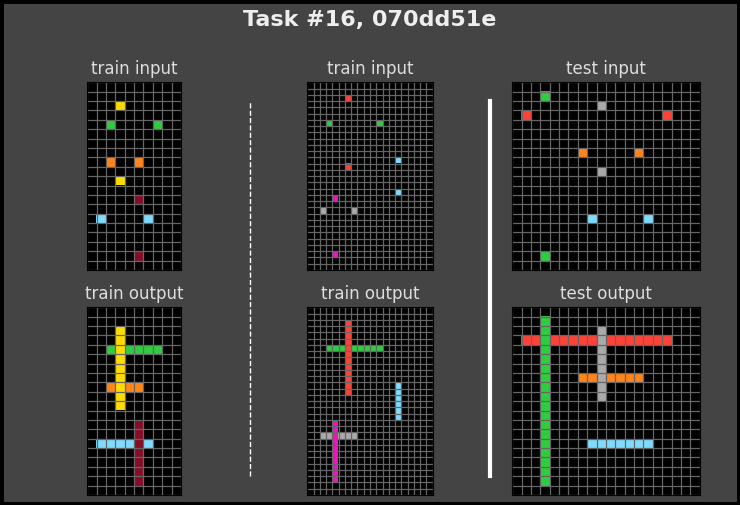

#17, 08ed6ac7


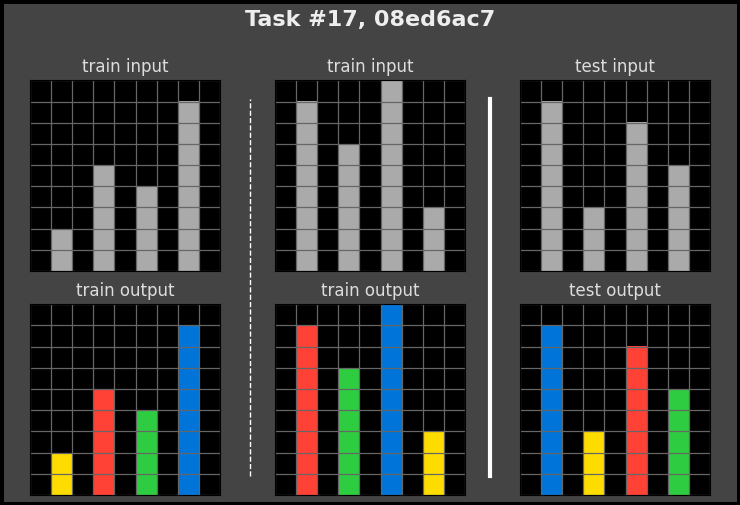

#18, 09629e4f


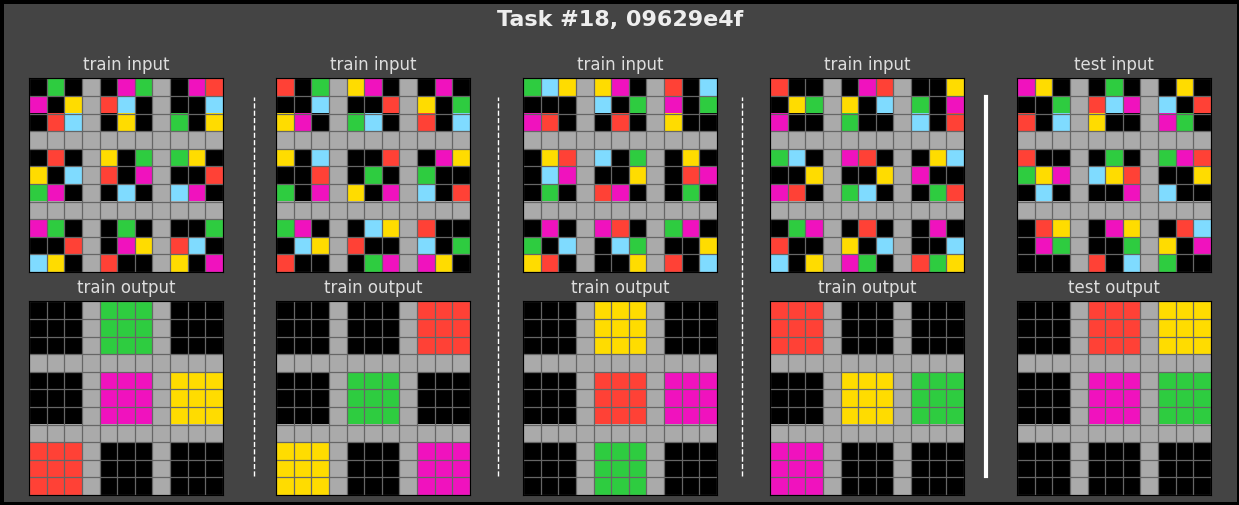

#19, 0962bcdd


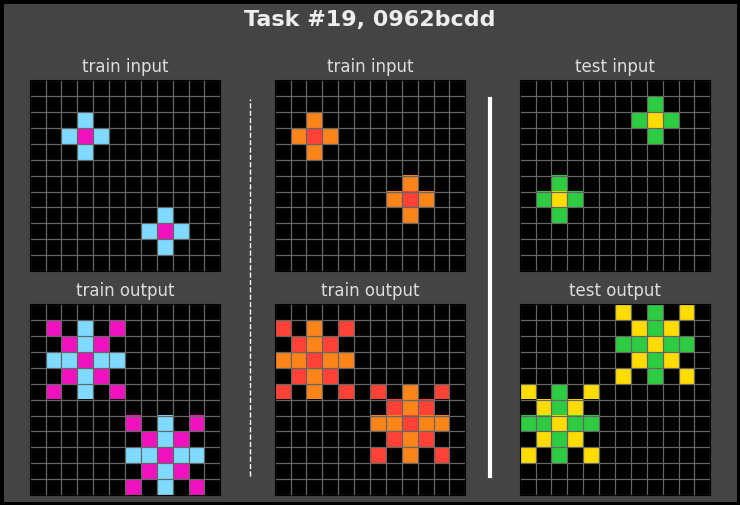

#20, 09c534e7


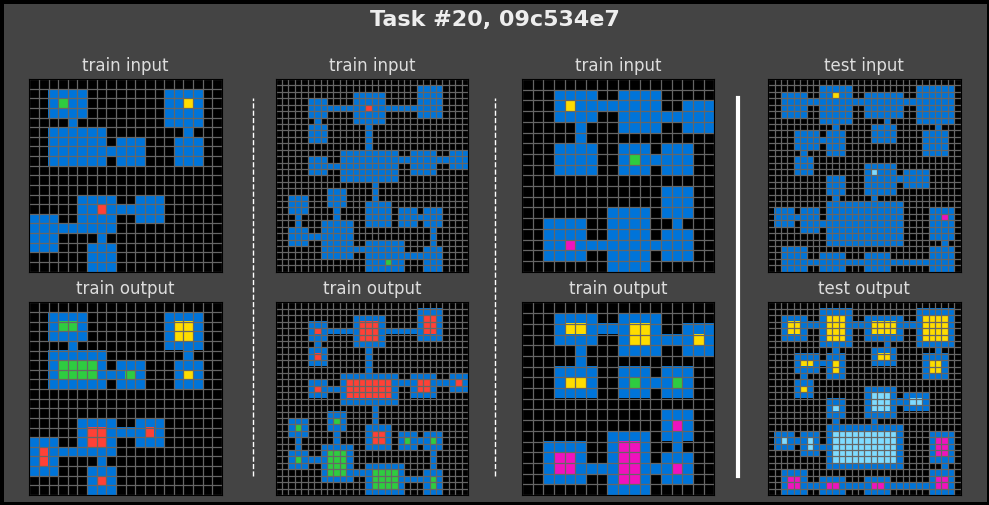

#21, 0a1d4ef5


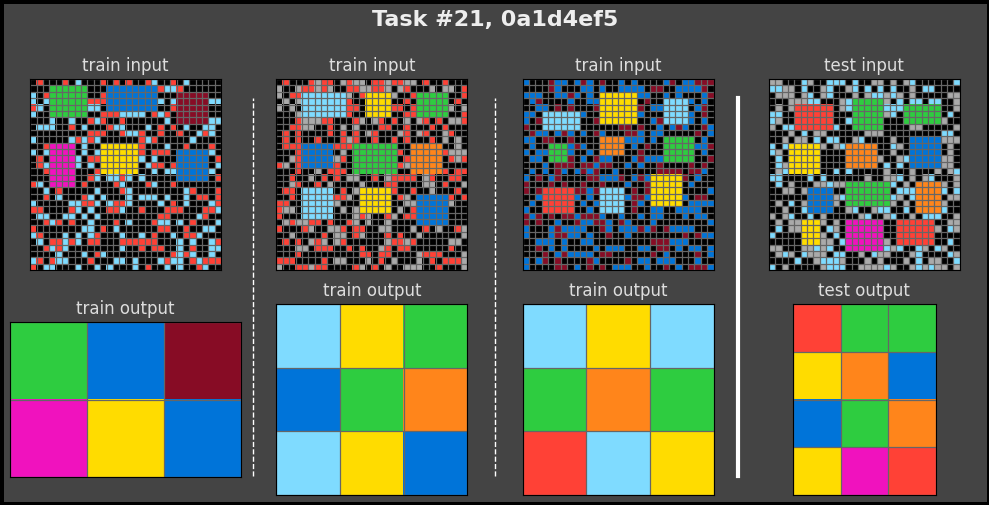

#22, 0a2355a6


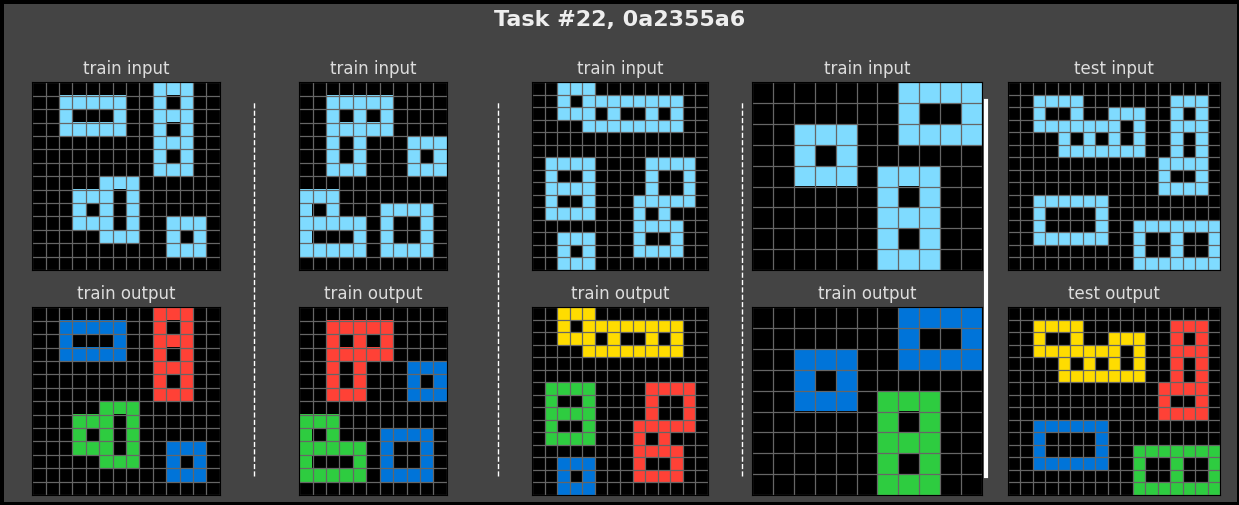

#23, 0a938d79


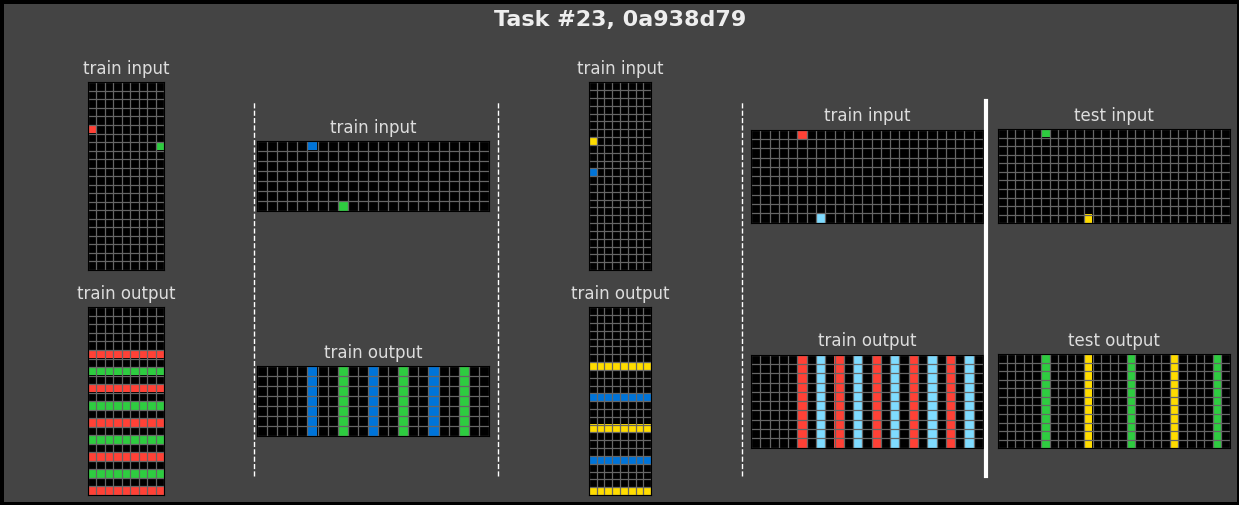

#24, 0b148d64


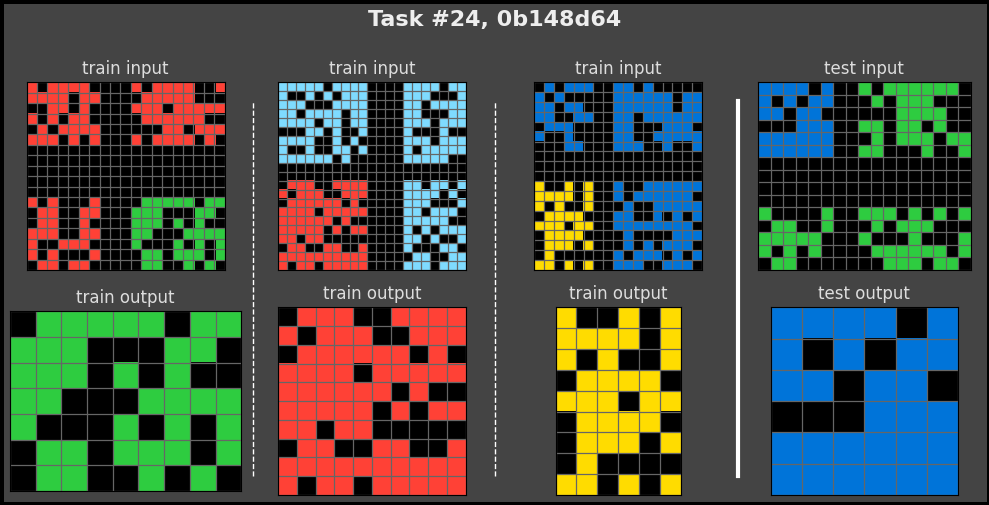

#25, 0b17323b


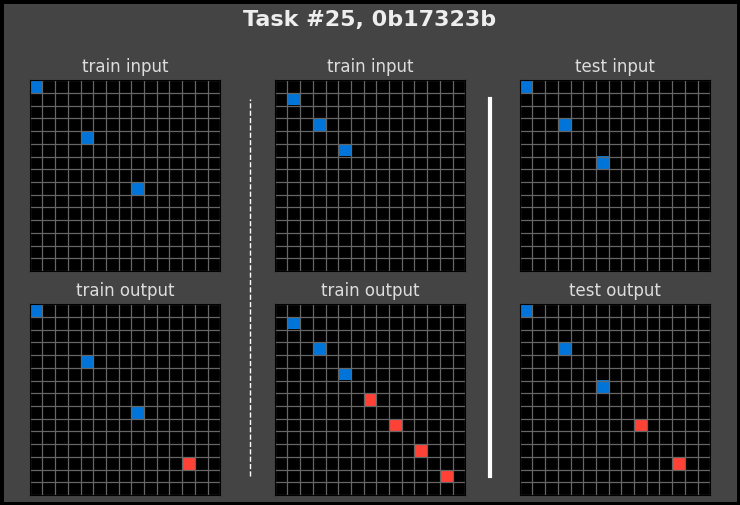

#26, 0bb8deee


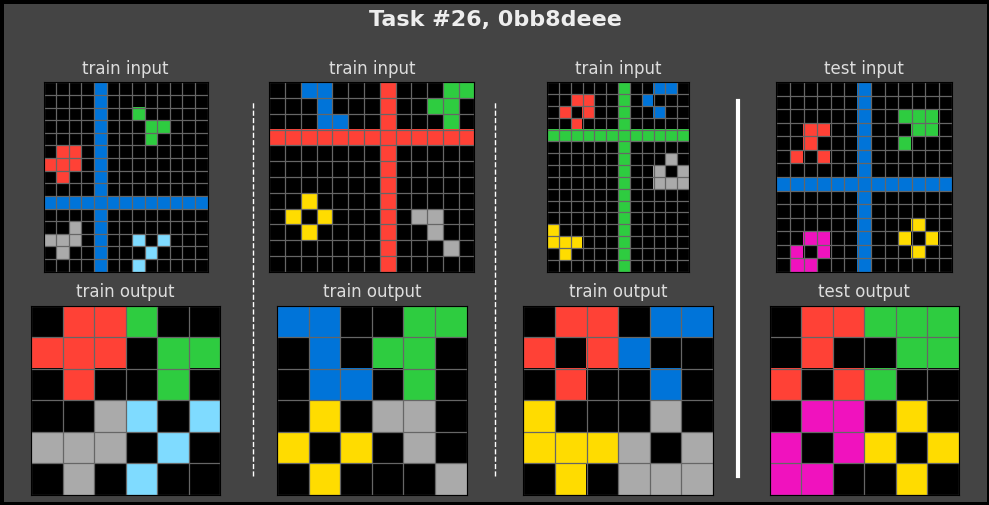

#27, 0becf7df


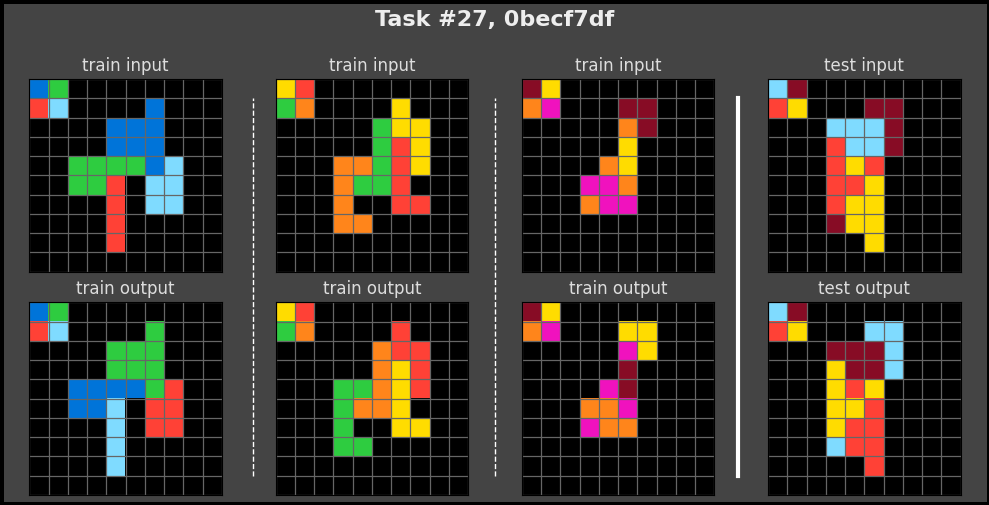

#28, 0c786b71


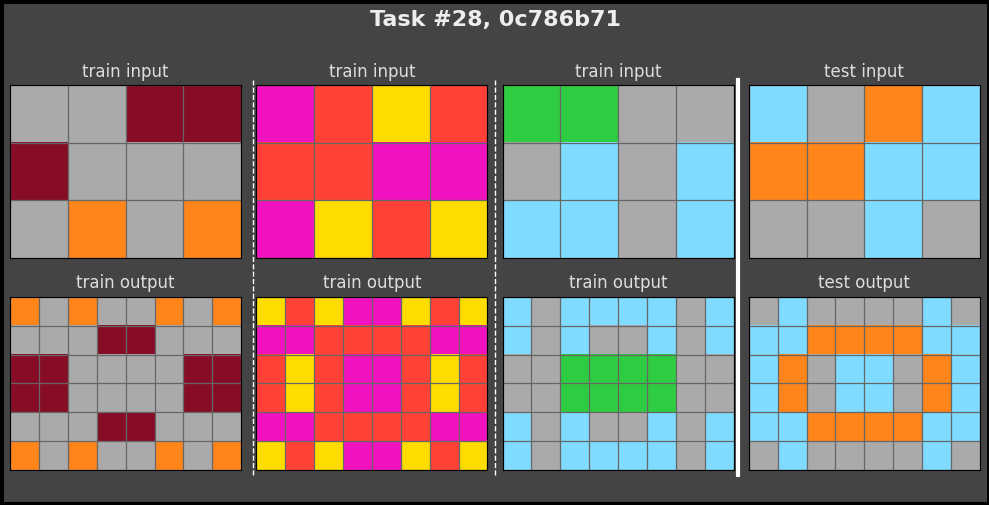

#29, 0c9aba6e


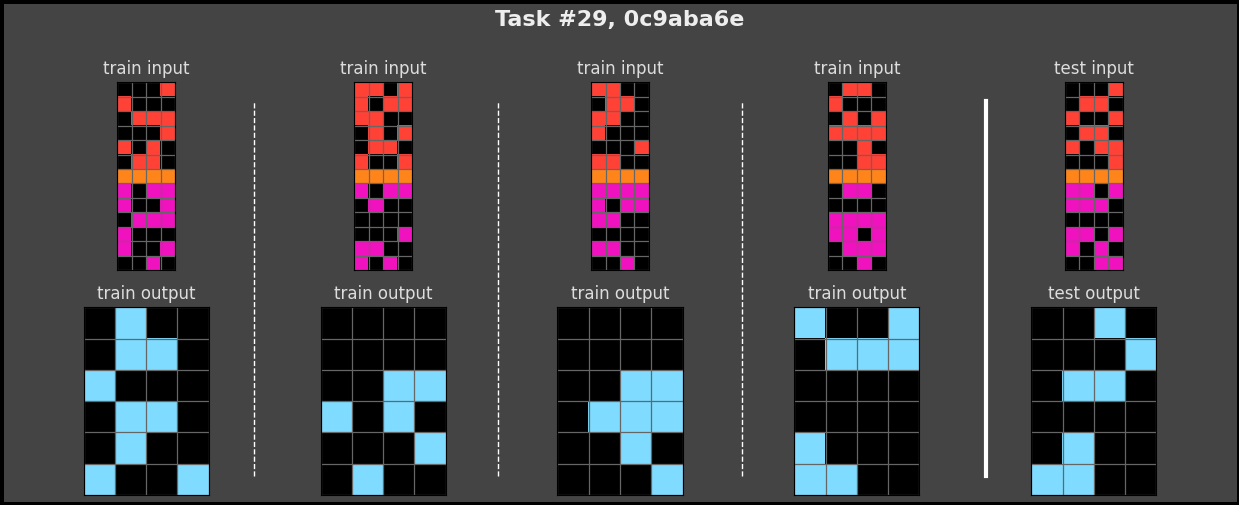

#30, 0ca9ddb6


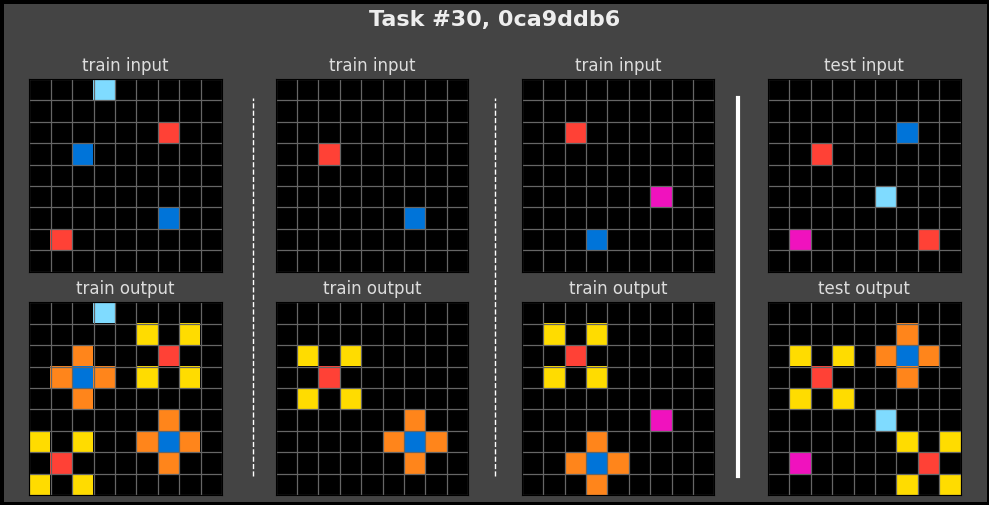

#31, 0d3d703e


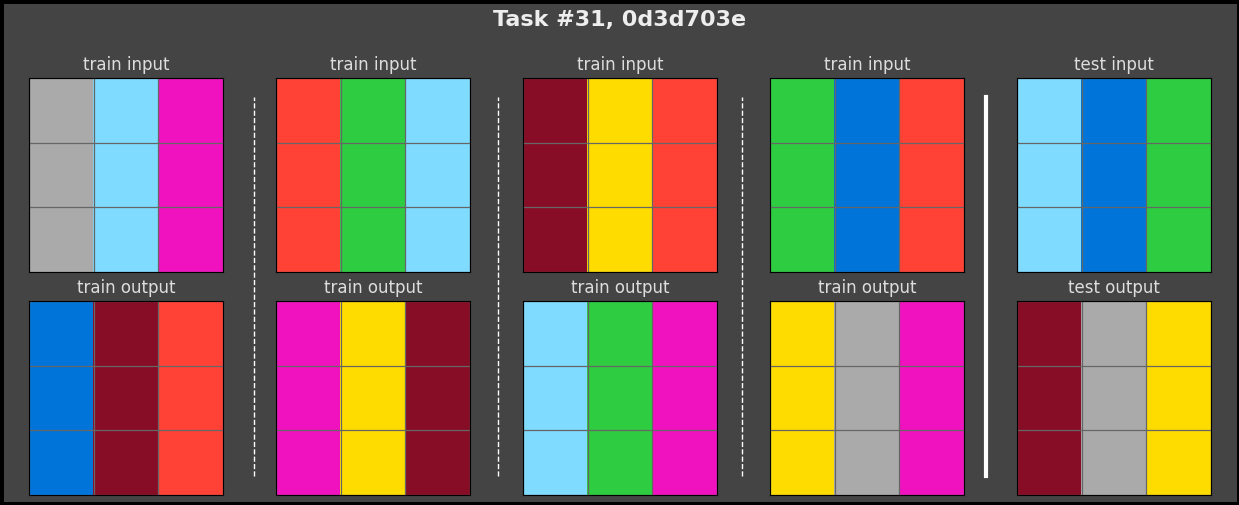

#32, 0d87d2a6


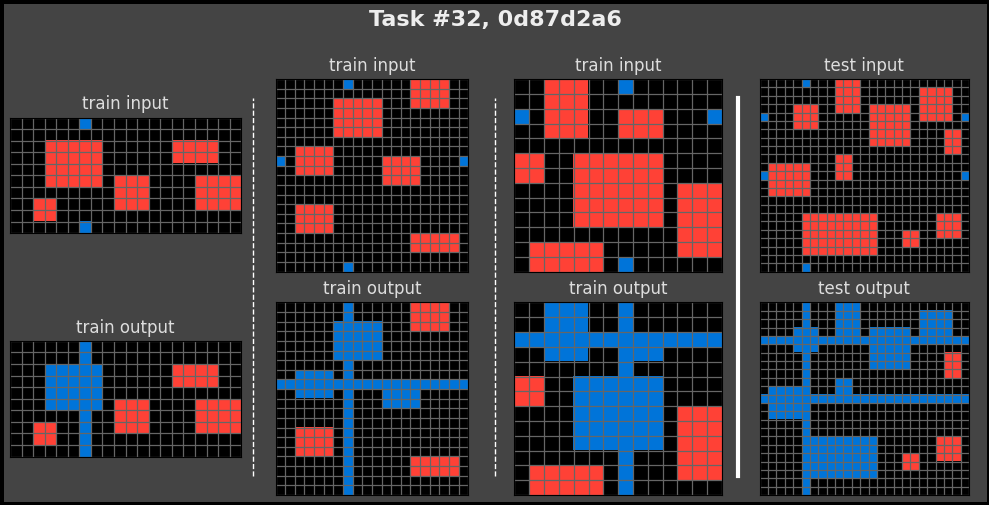

#33, 0e206a2e


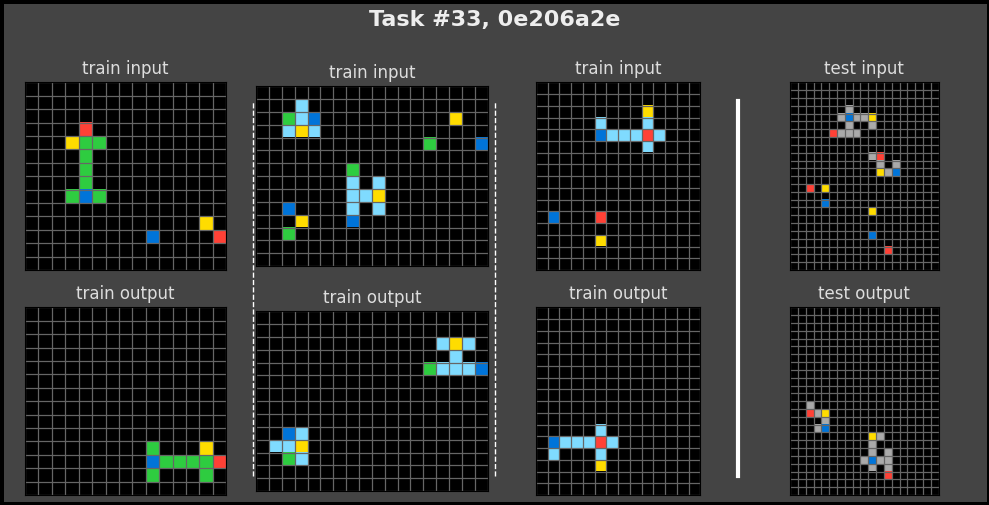

#34, 0e671a1a


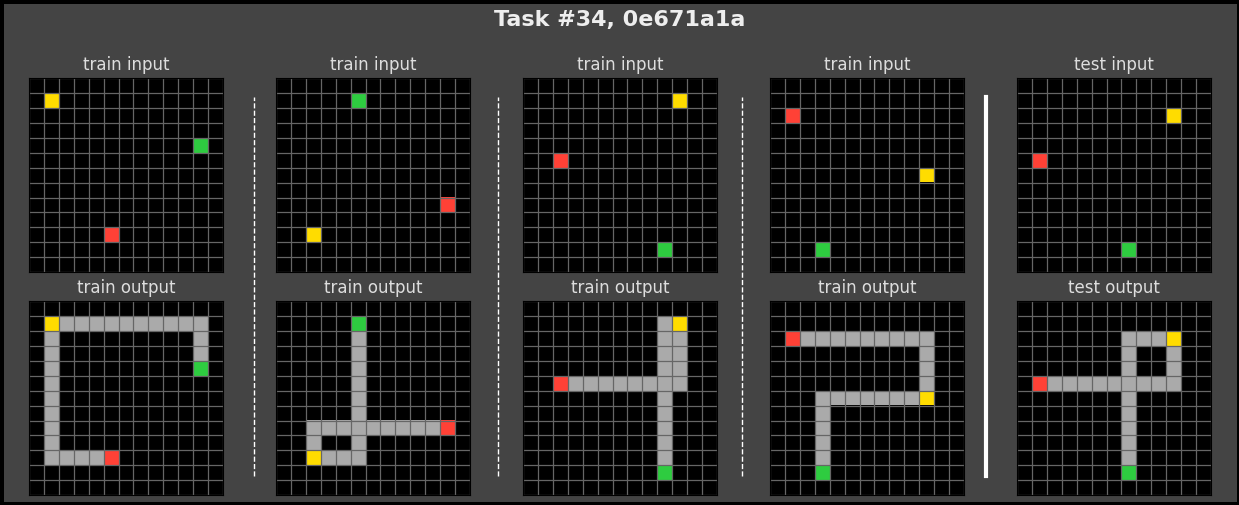

#35, 0f63c0b9


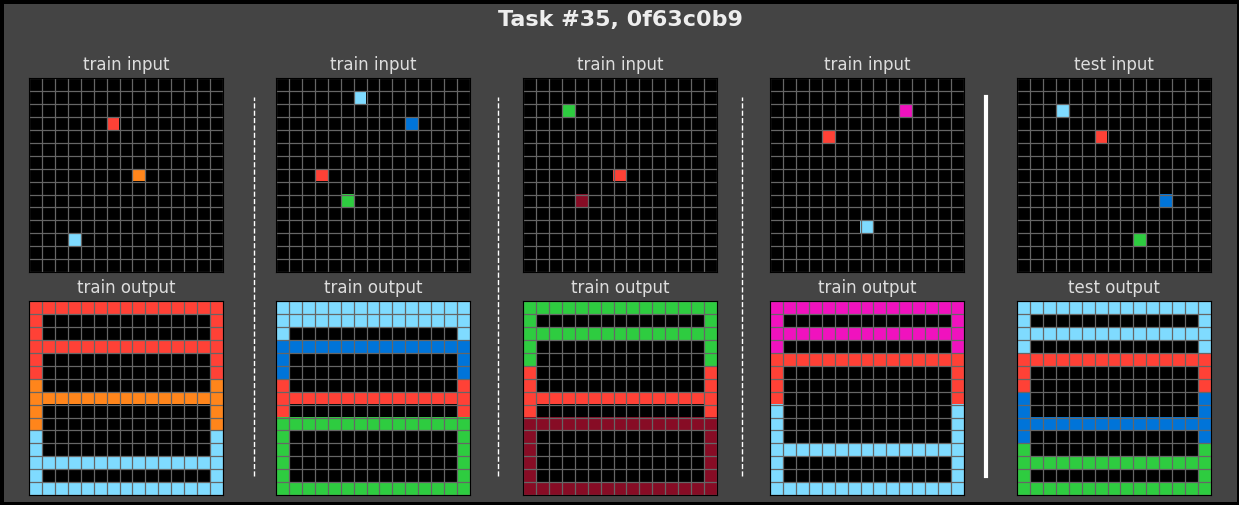

#36, 103eff5b


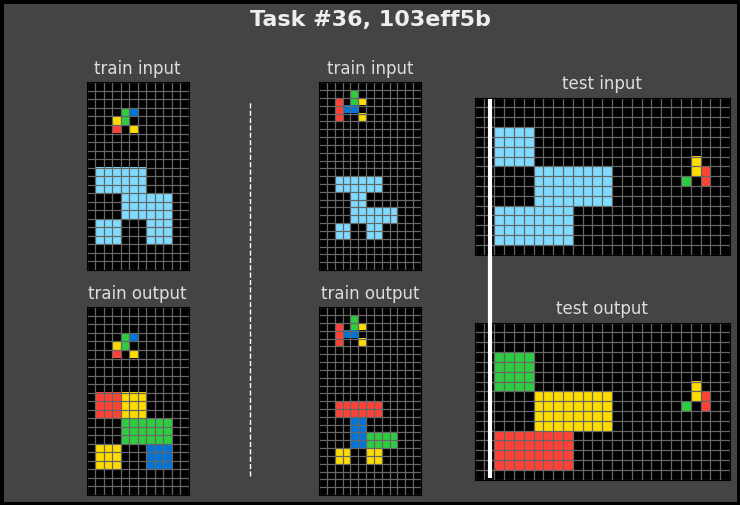

#37, 10fcaaa3


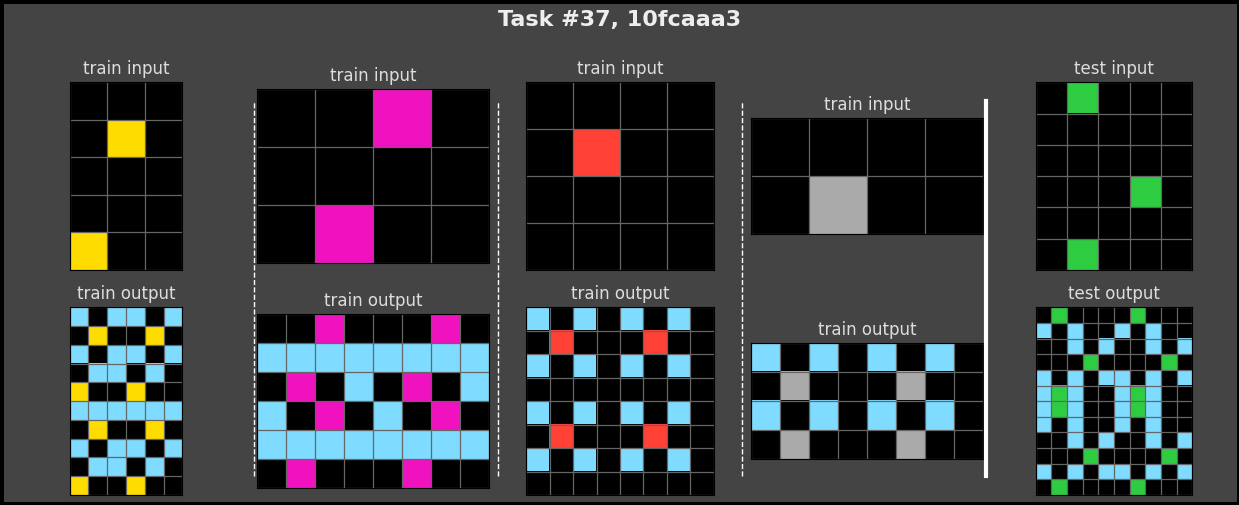

#38, 11852cab


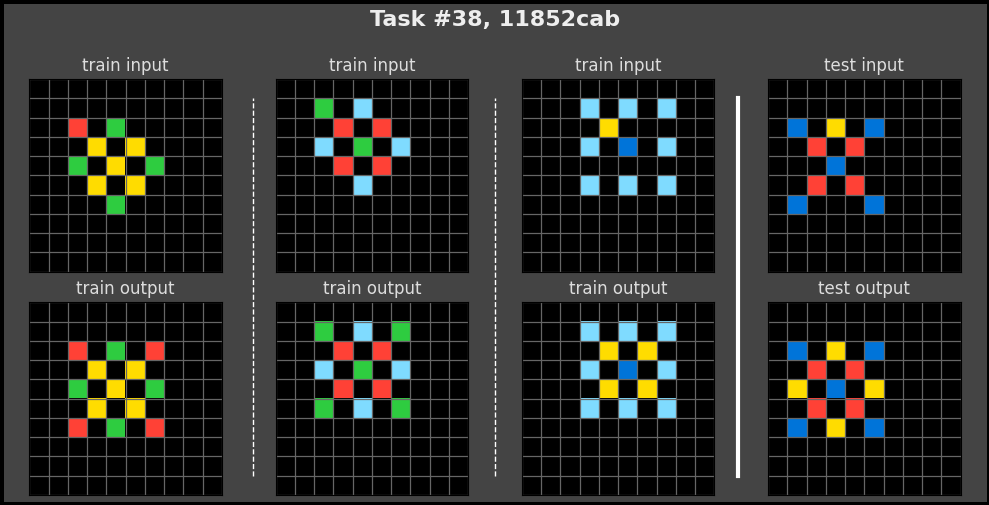

#39, 1190bc91


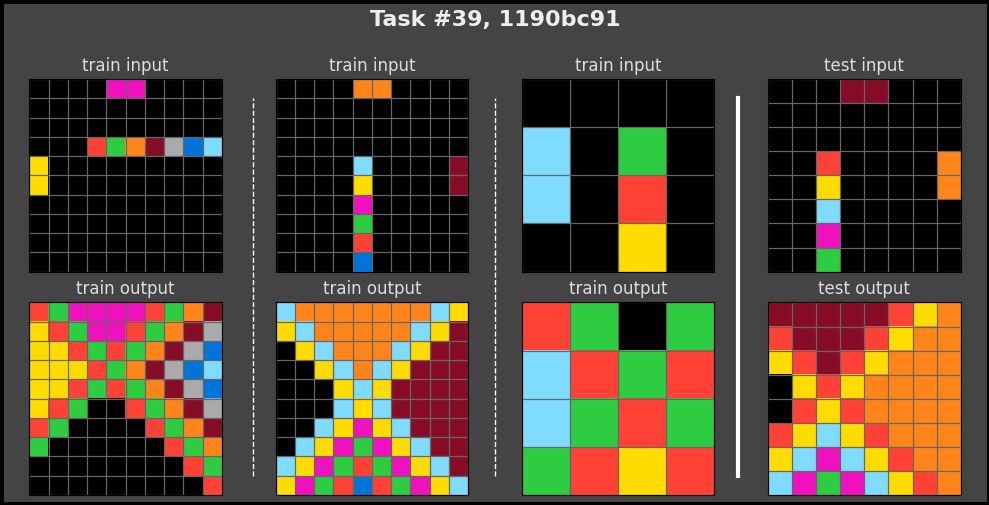

#40, 1190e5a7


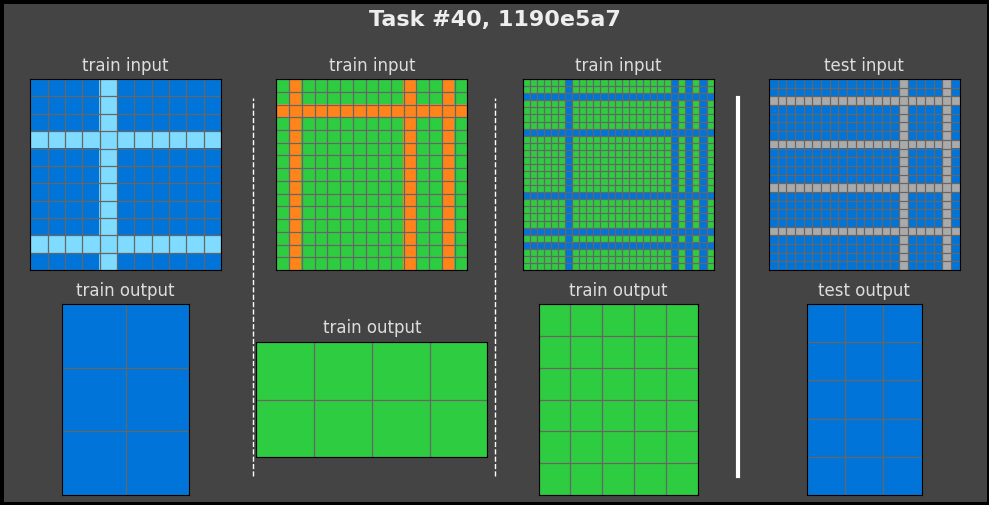

#41, 11dc524f


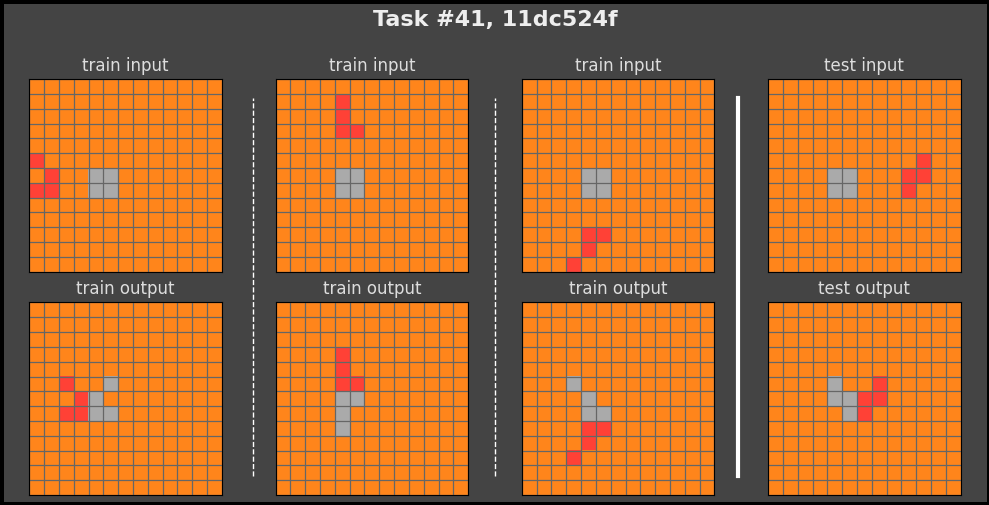

#42, 11e1fe23


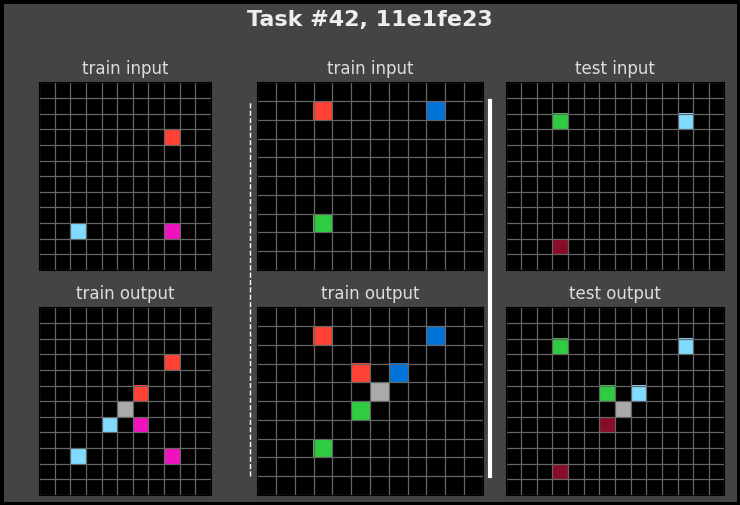

#43, 12422b43


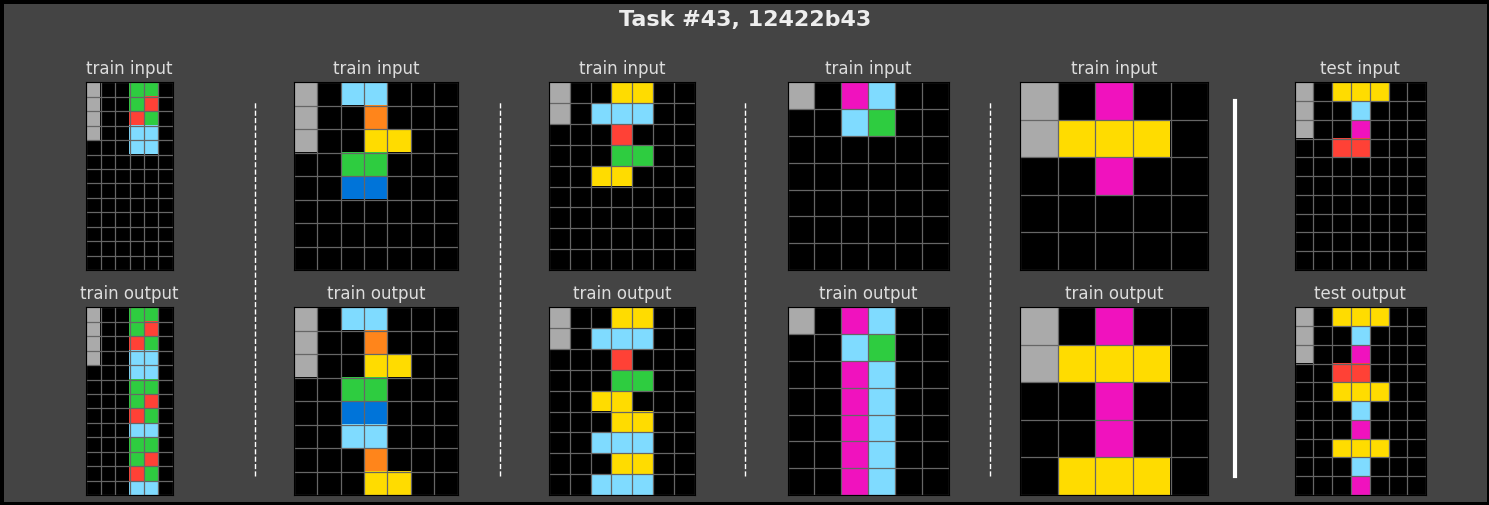

#44, 12997ef3


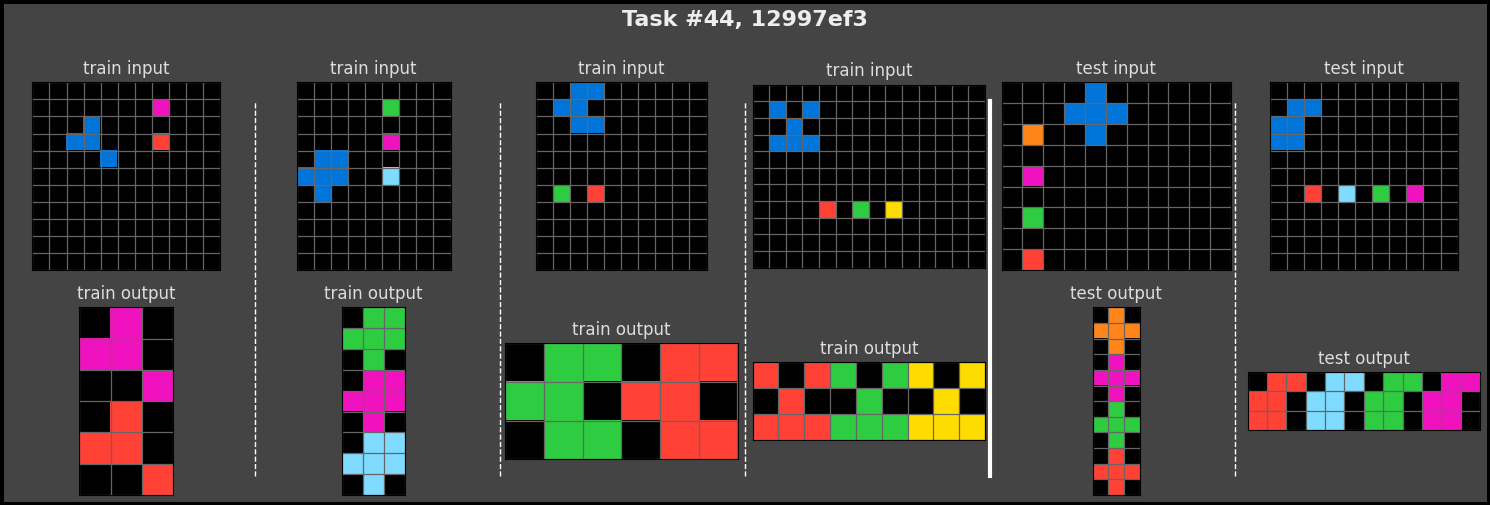

#45, 12eac192


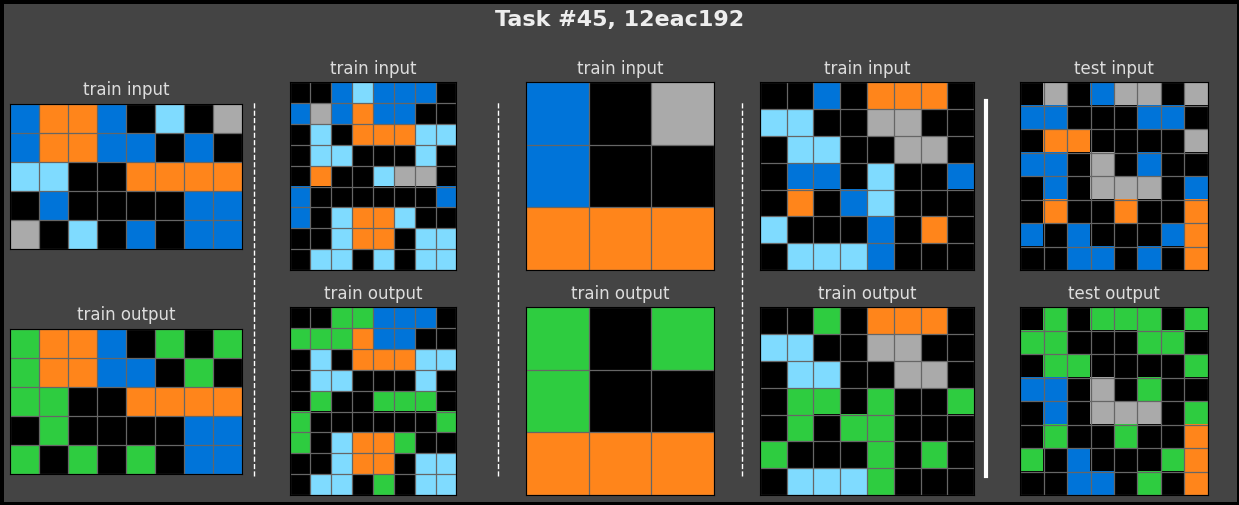

#46, 13713586


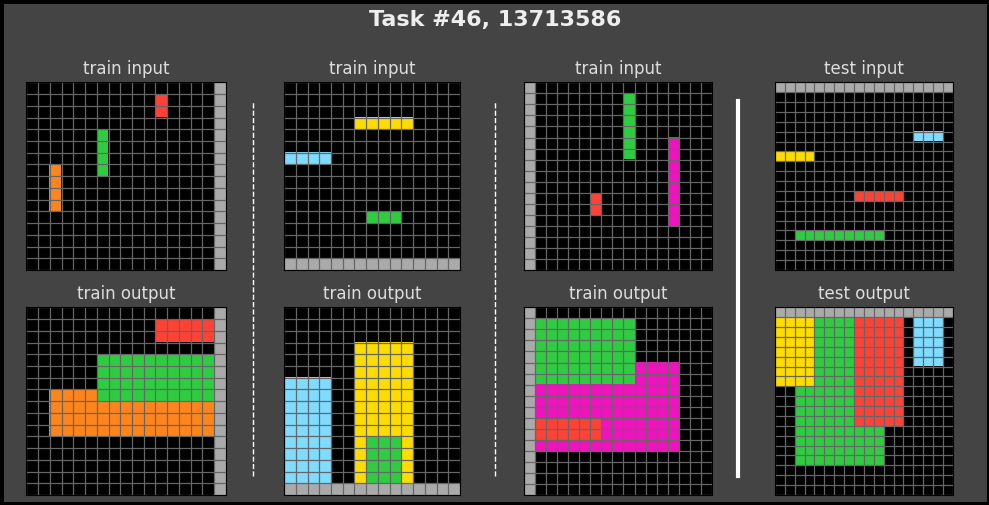

#47, 137eaa0f


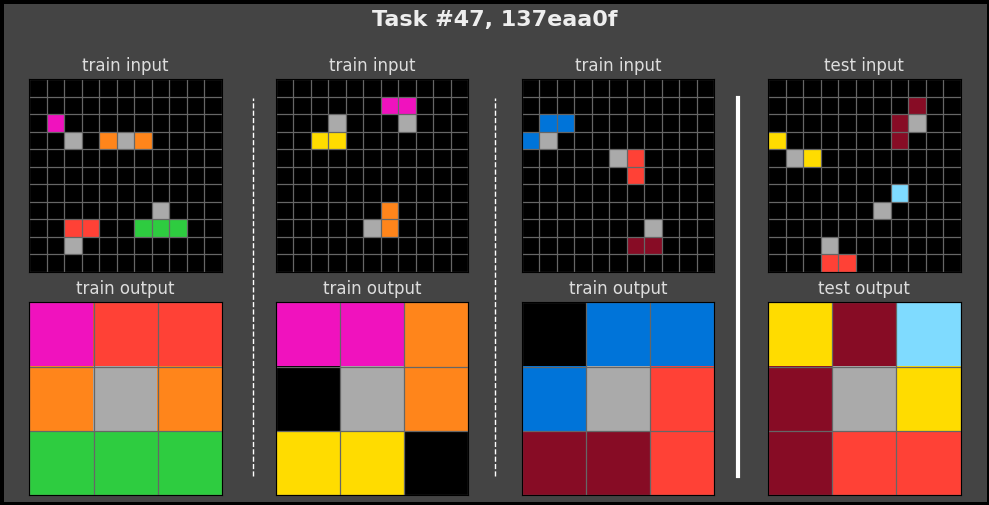

#48, 137f0df0


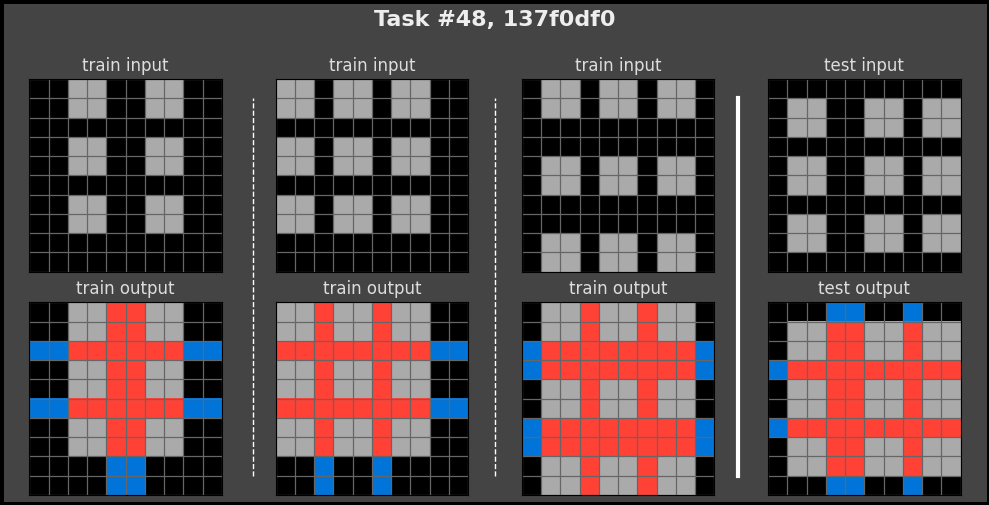

#49, 13f06aa5


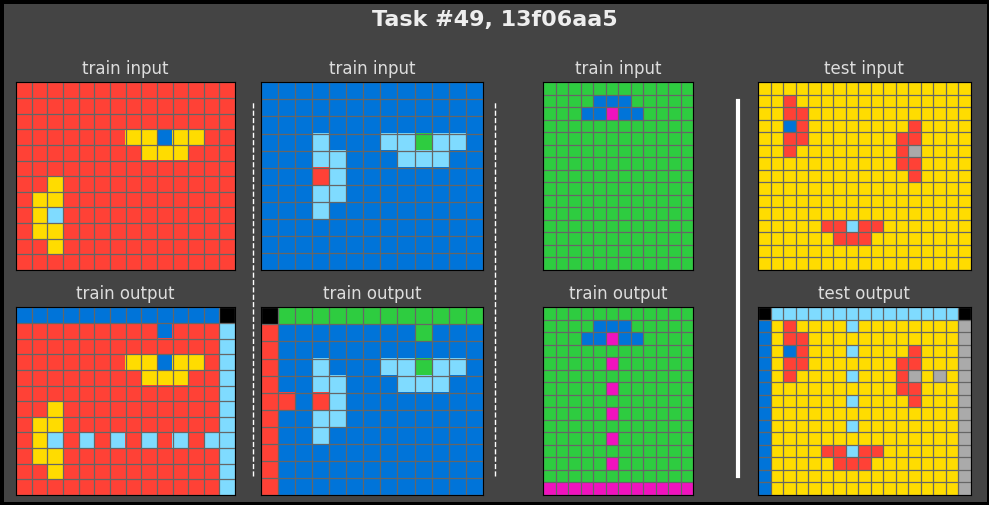

#50, 140c817e


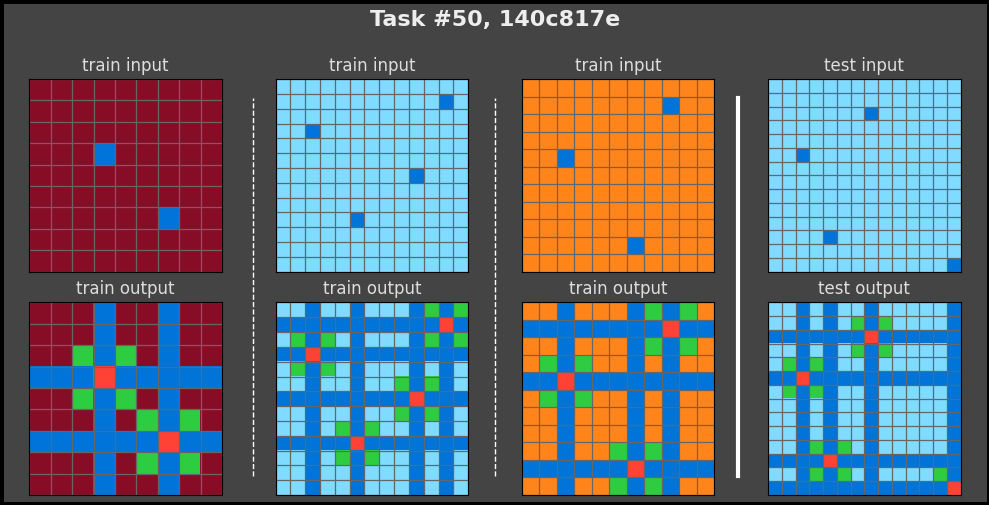

#51, 14754a24


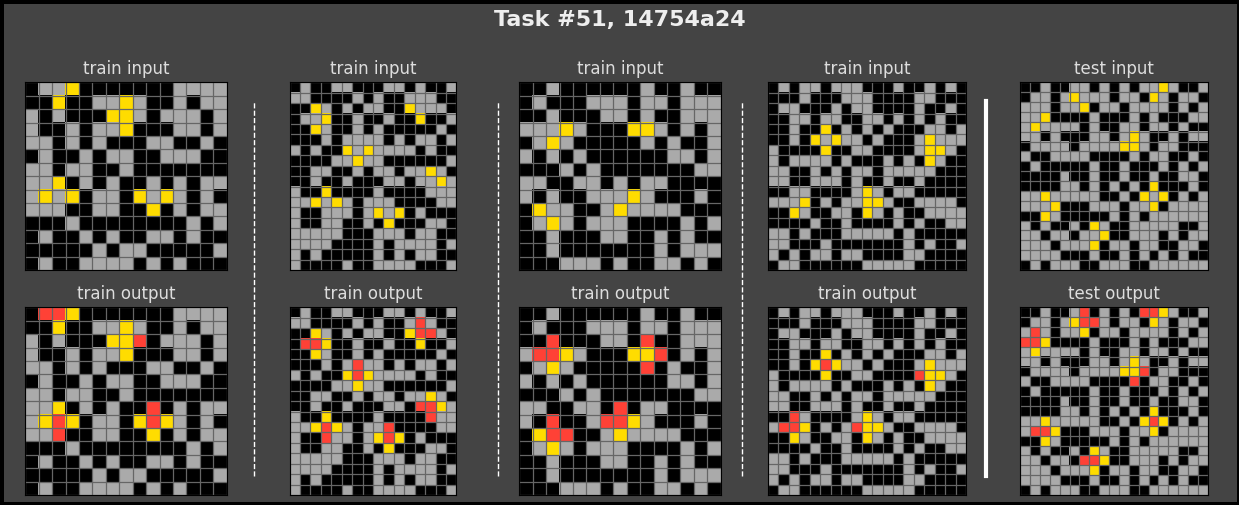

#52, 1478ab18


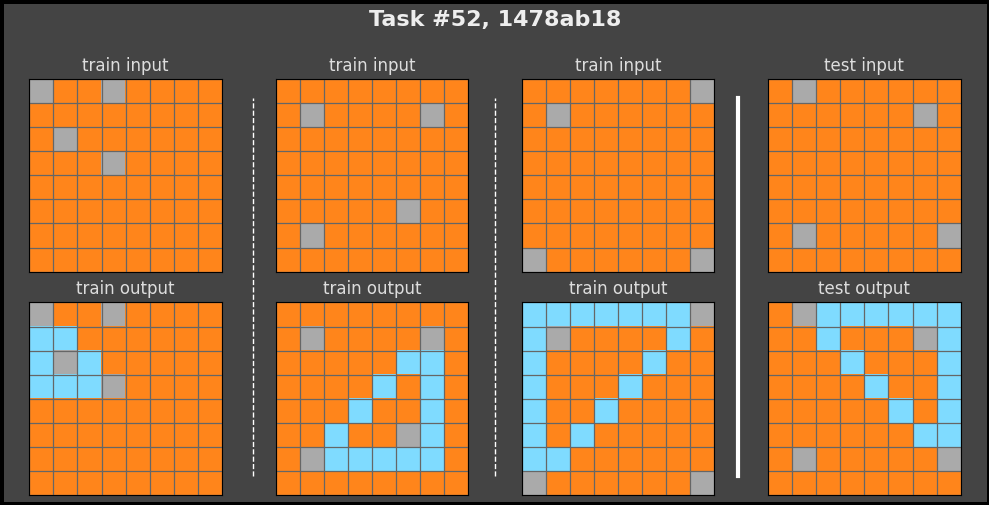

#53, 14b8e18c


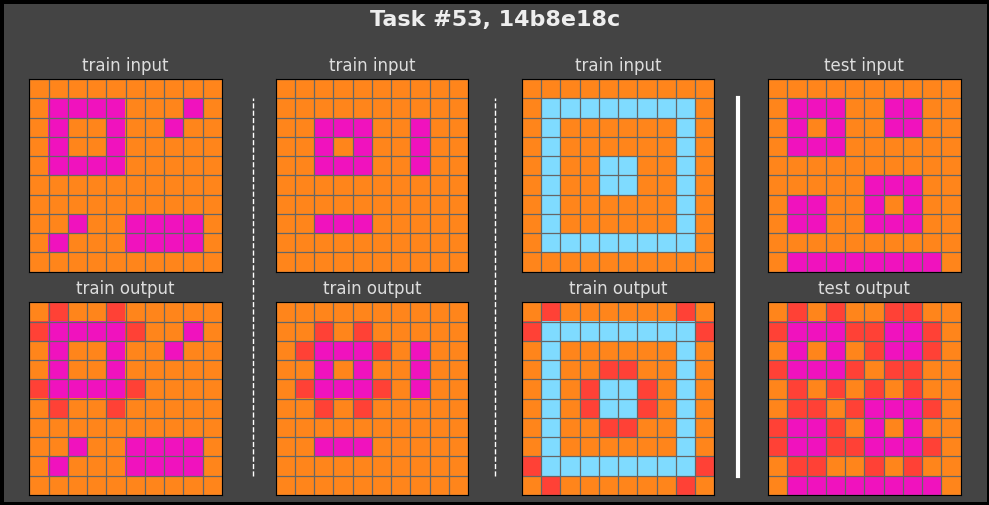

#54, 150deff5


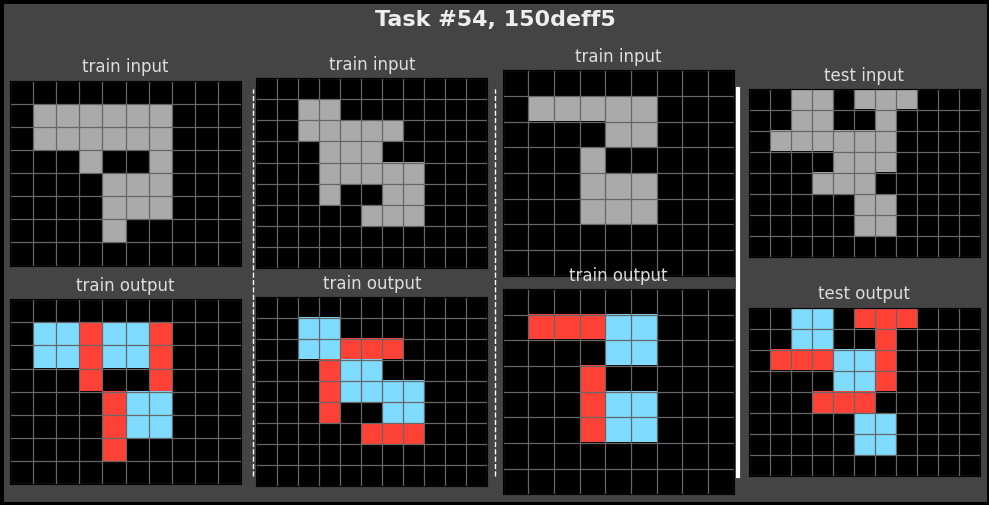

#55, 15113be4


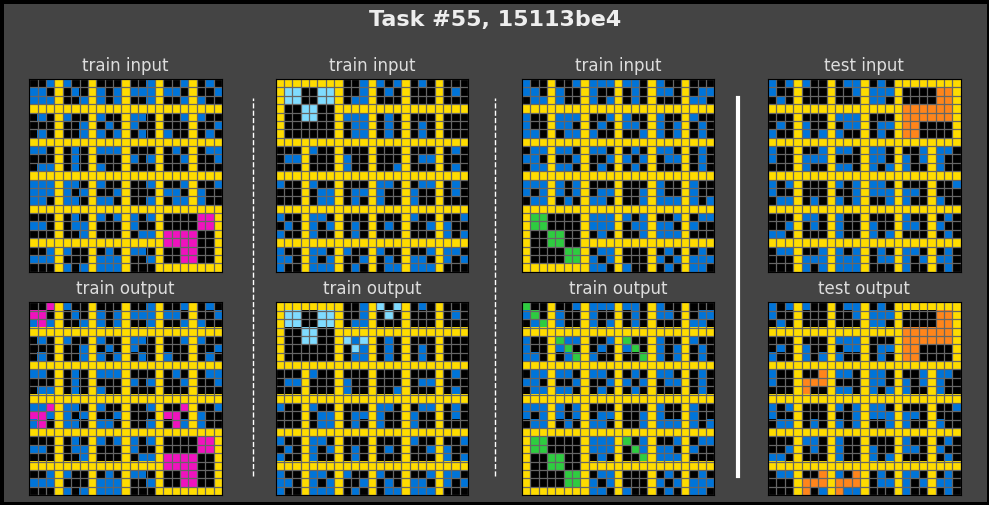

#56, 15660dd6


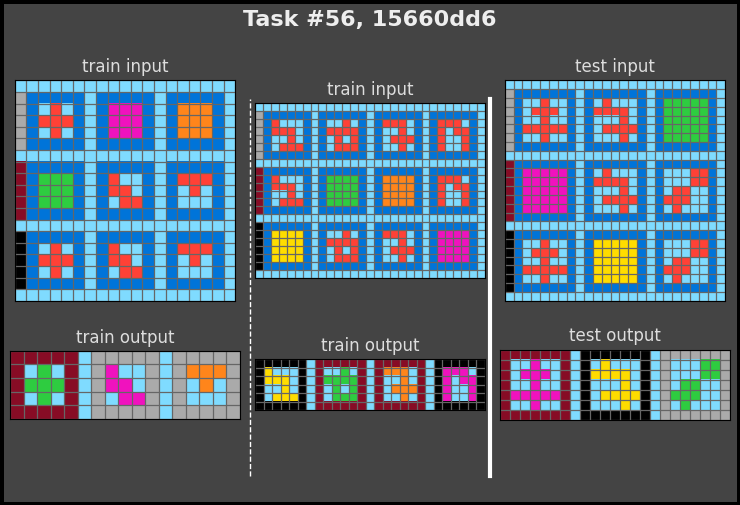

#57, 15663ba9


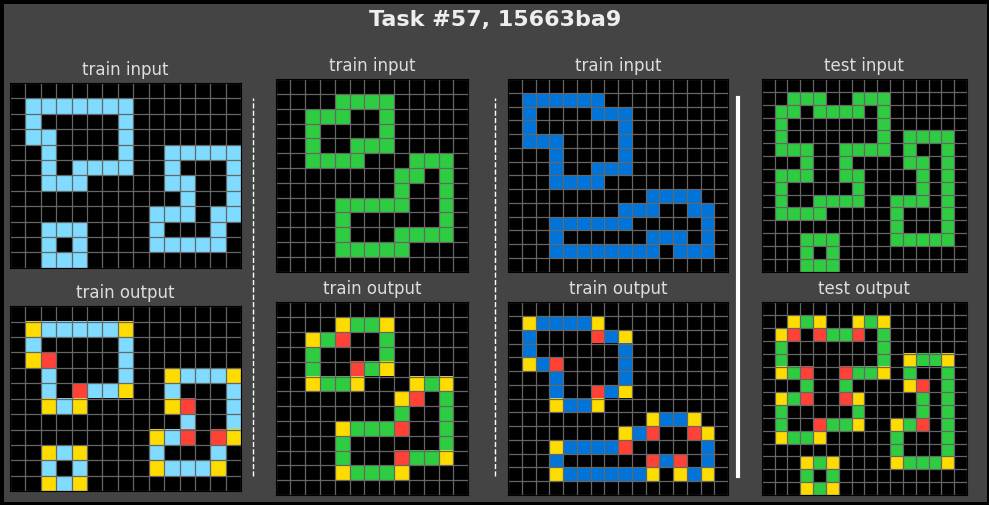

#58, 15696249


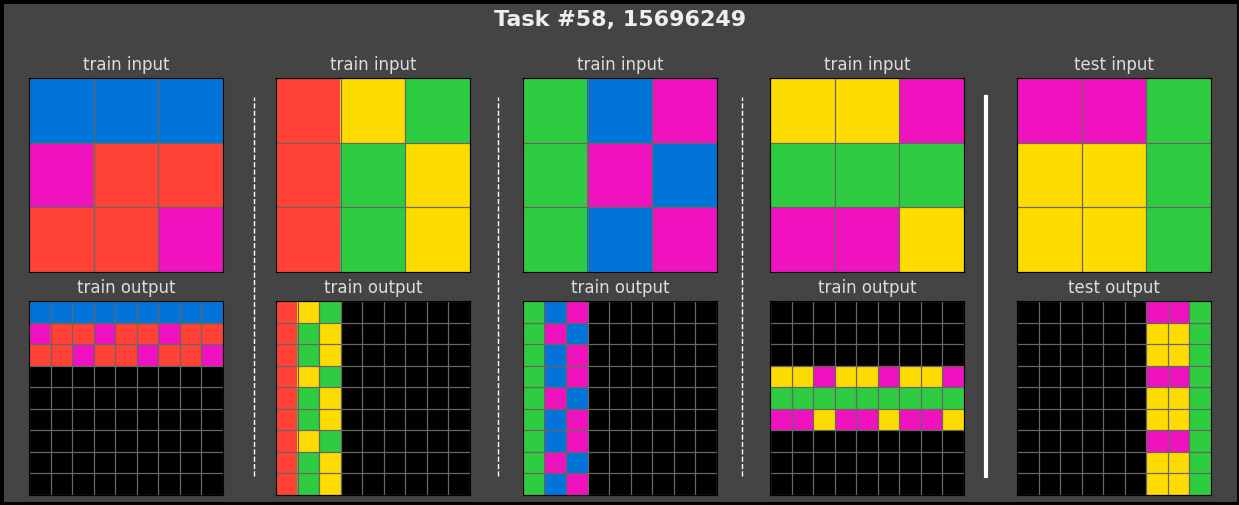

#59, 17829a00


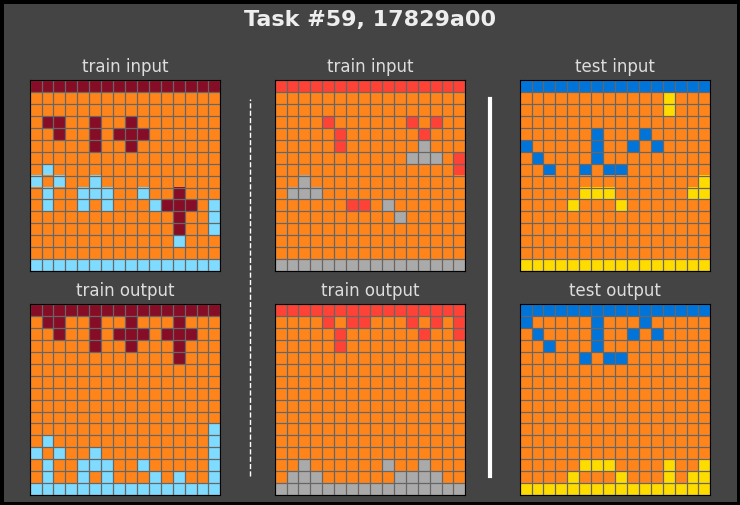

#60, 178fcbfb


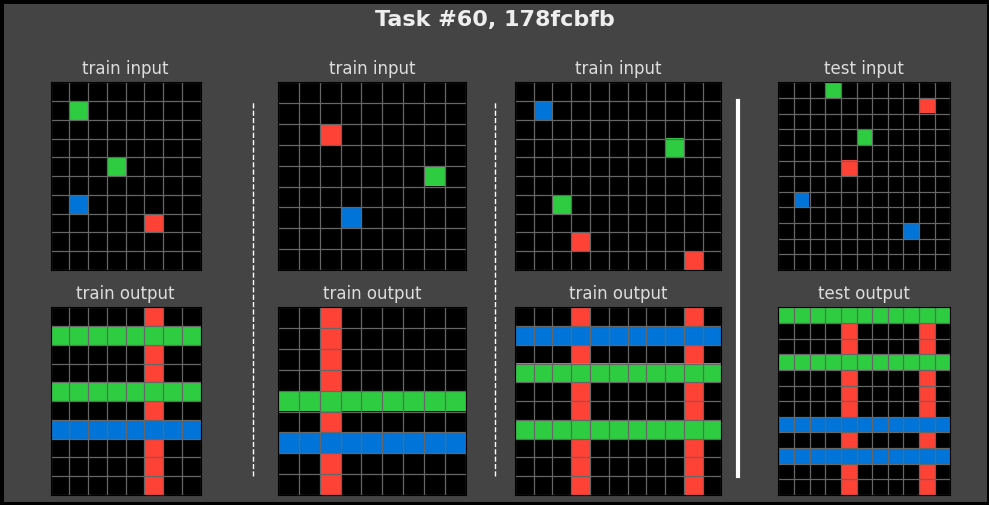

#61, 17b80ad2


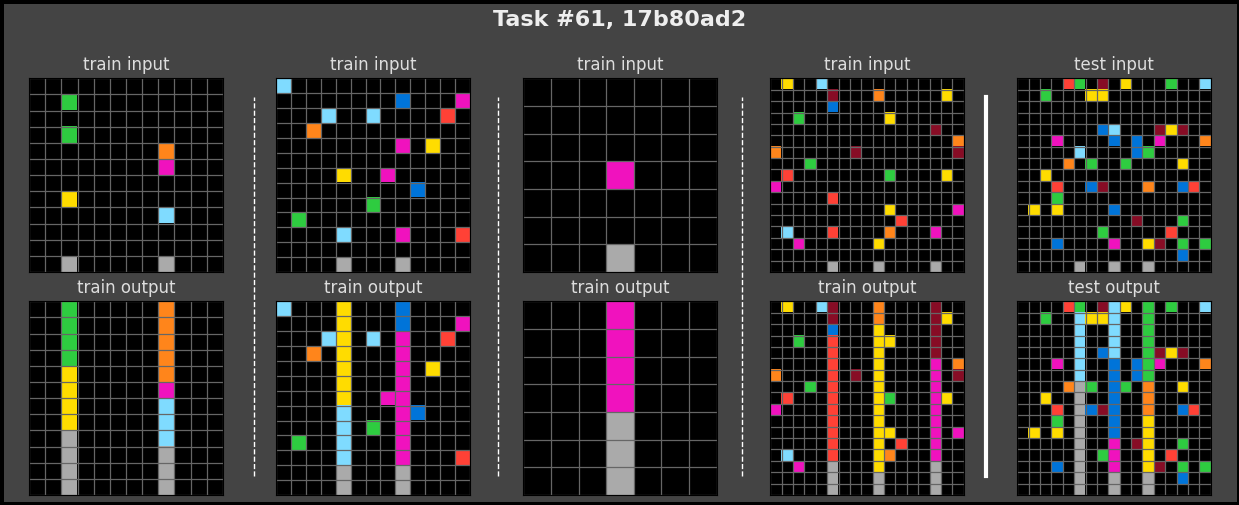

#62, 17b866bd


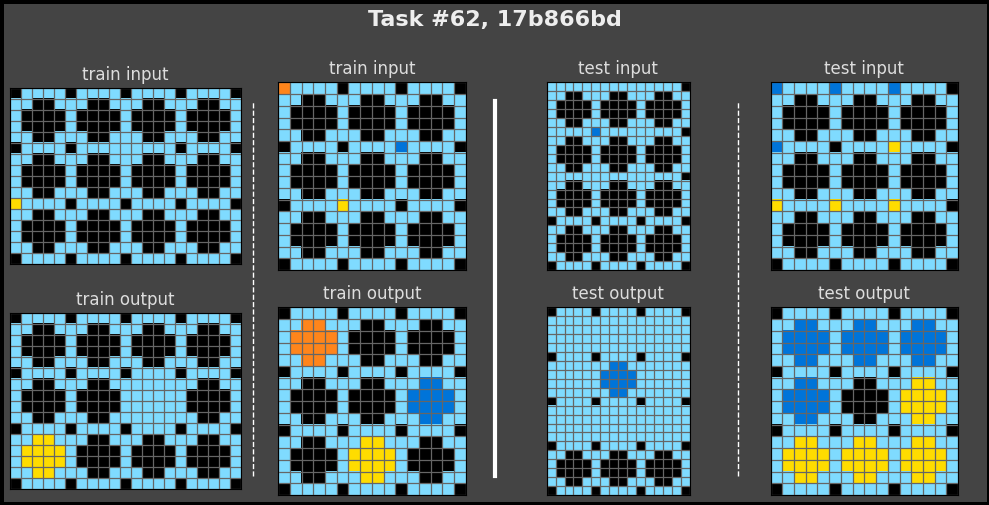

#63, 17cae0c1


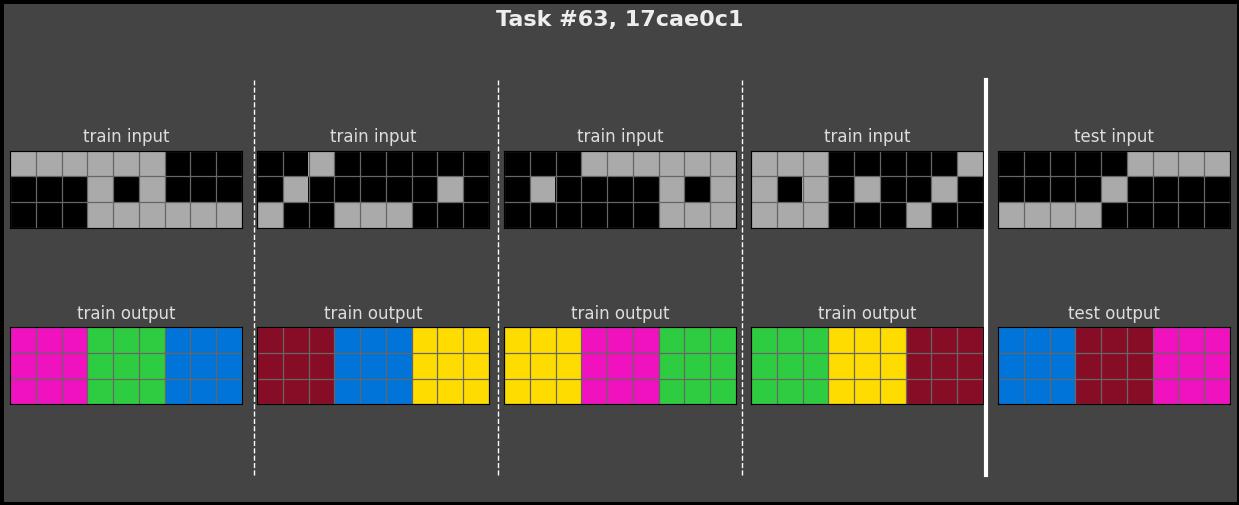

#64, 18286ef8


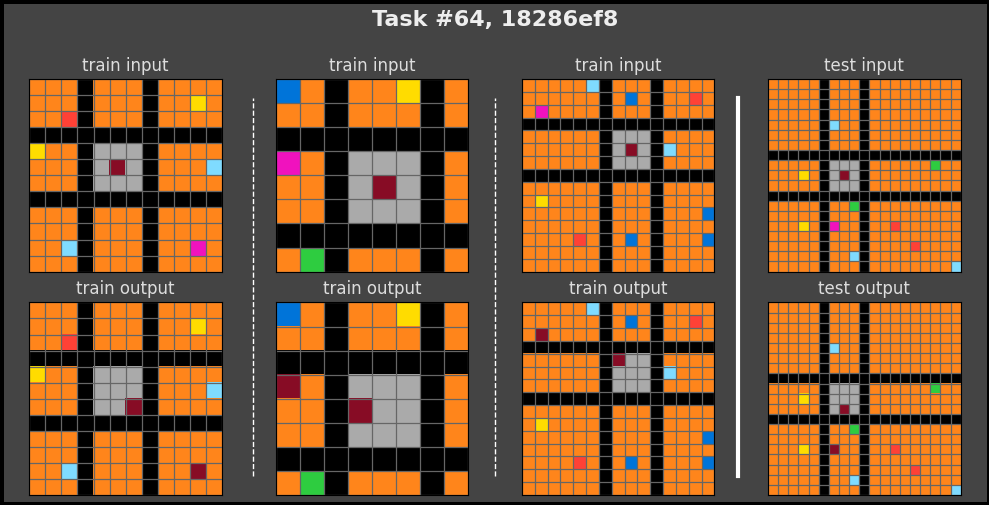

#65, 182e5d0f


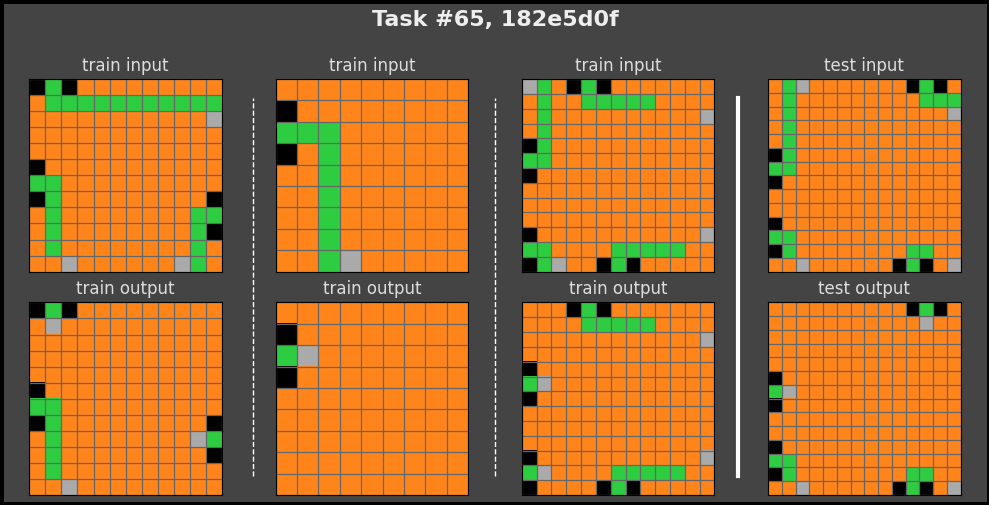

#66, 18419cfa


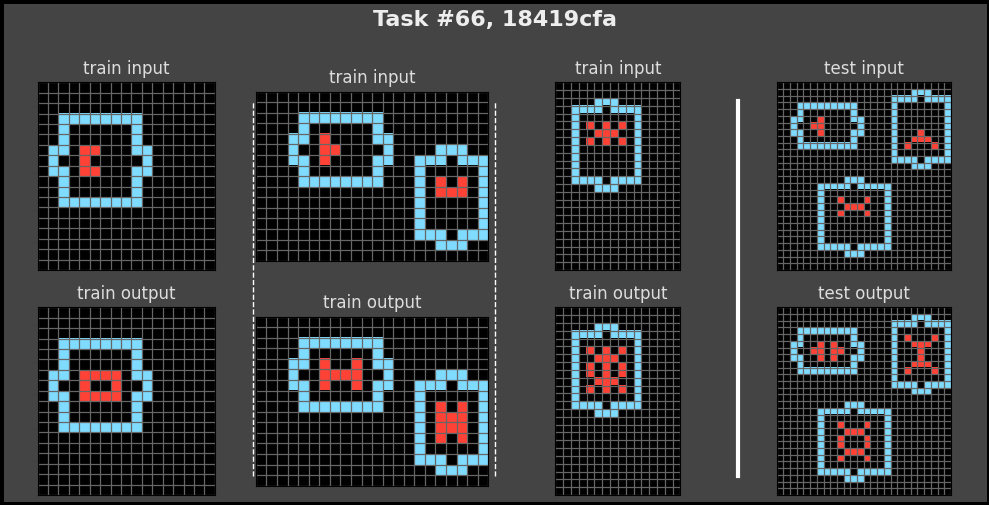

#67, 18447a8d


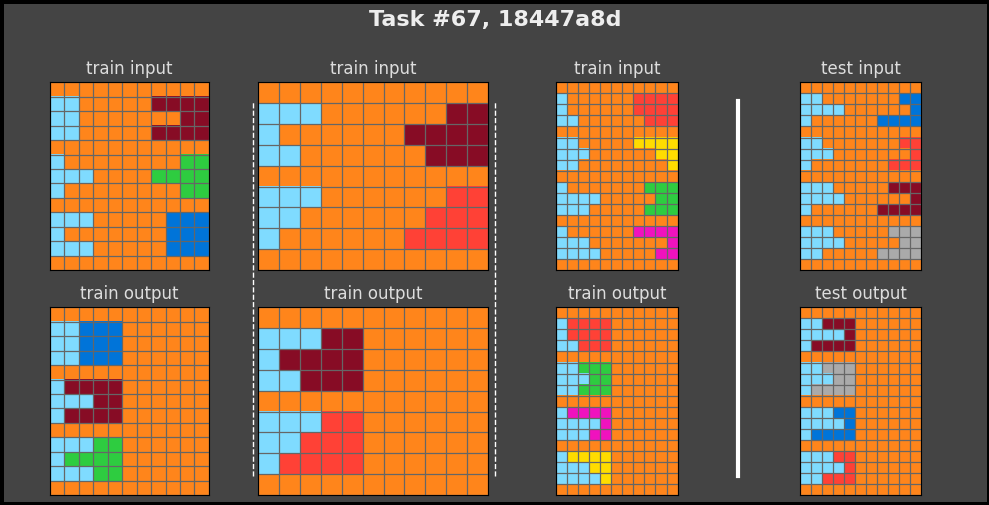

#68, 184a9768


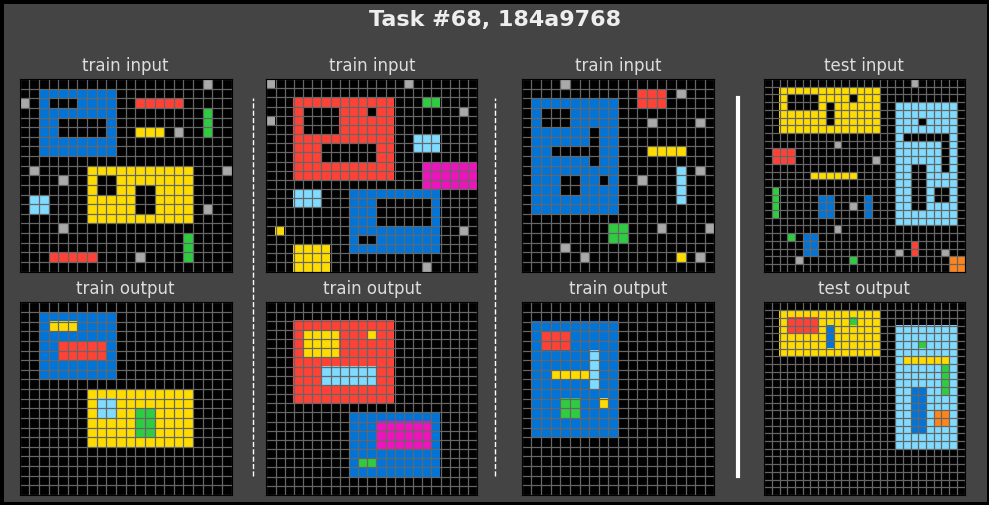

#69, 195ba7dc


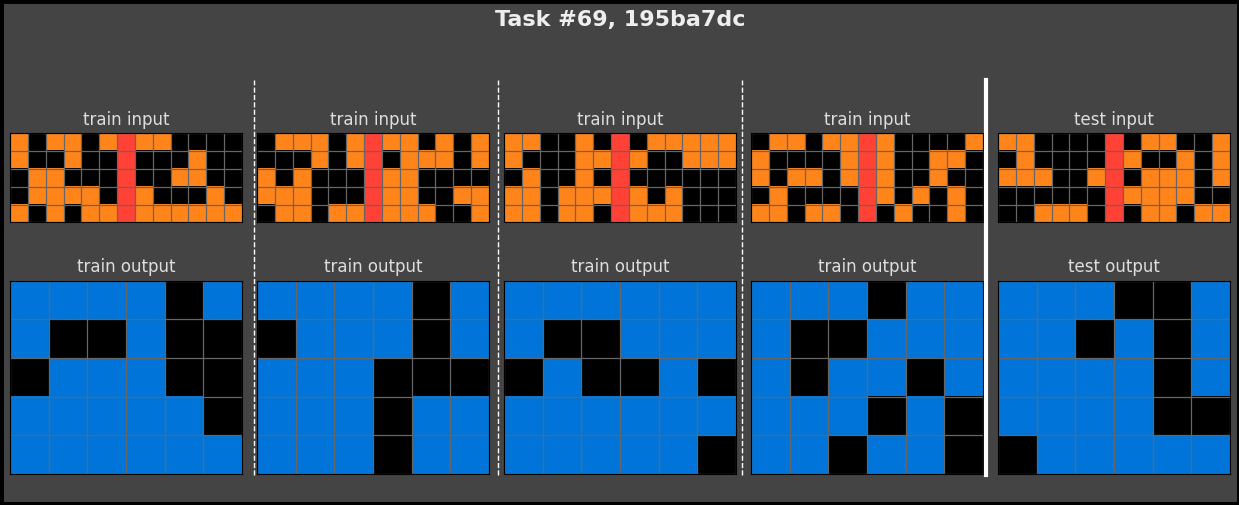

#70, 1990f7a8


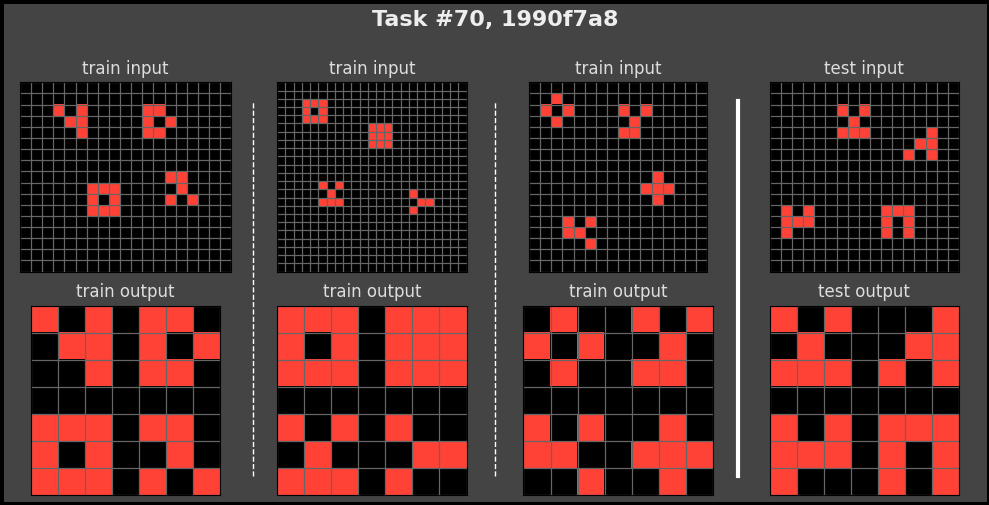

#71, 19bb5feb


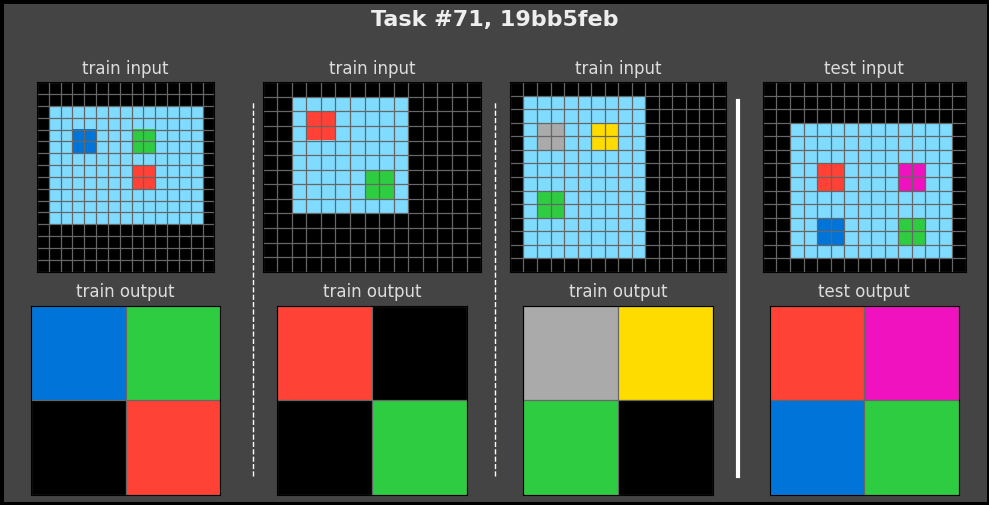

#72, 1a07d186


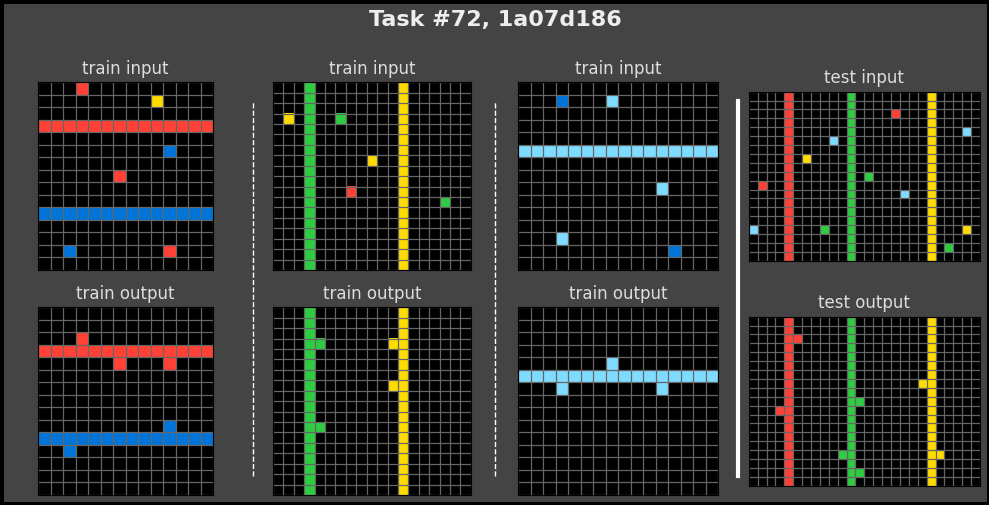

#73, 1a244afd


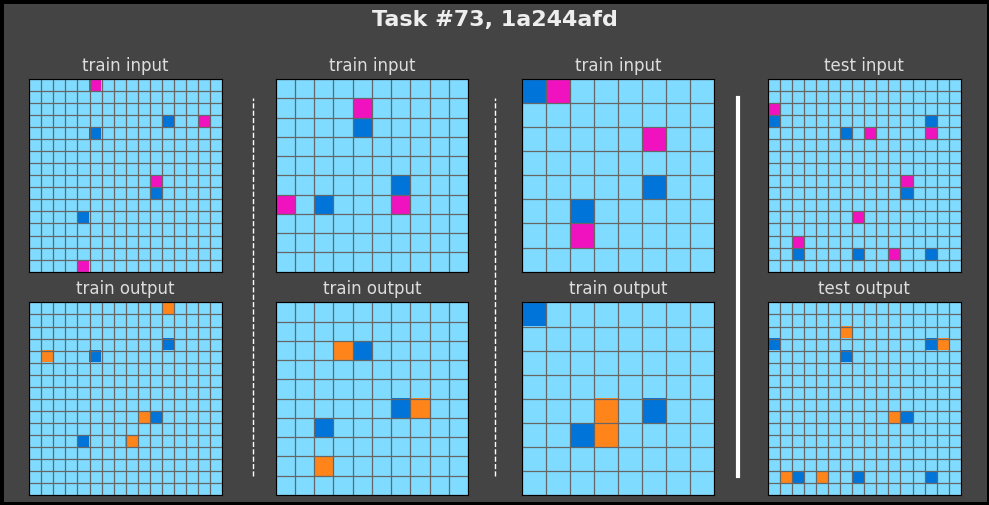

#74, 1a2e2828


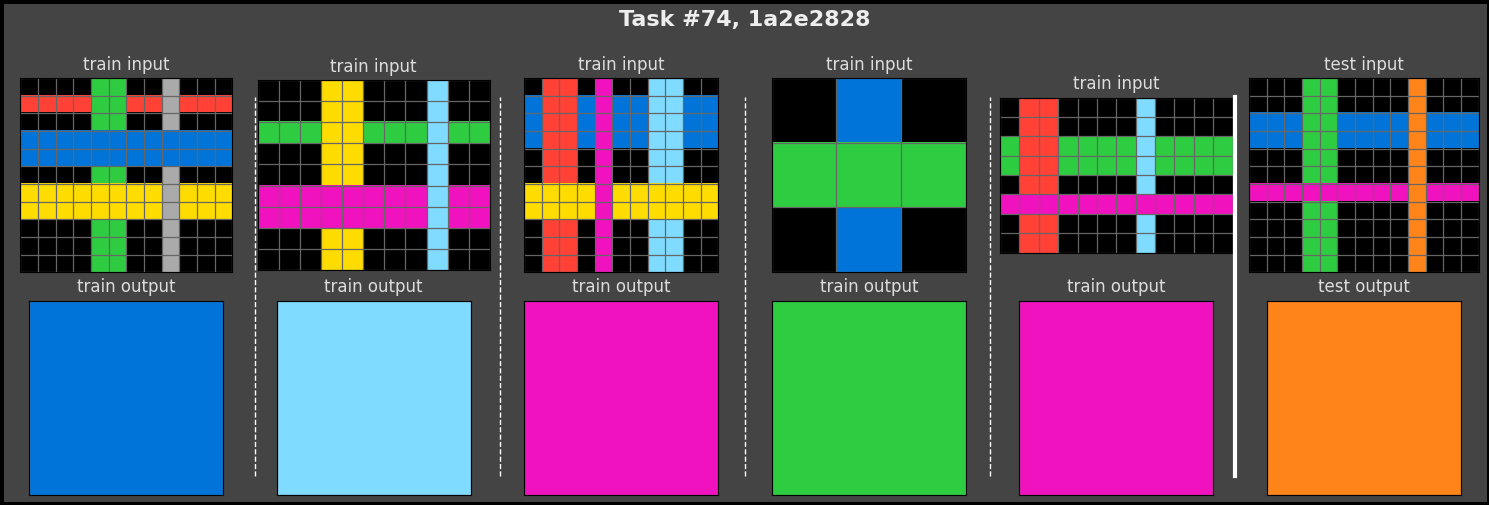

#75, 1a6449f1


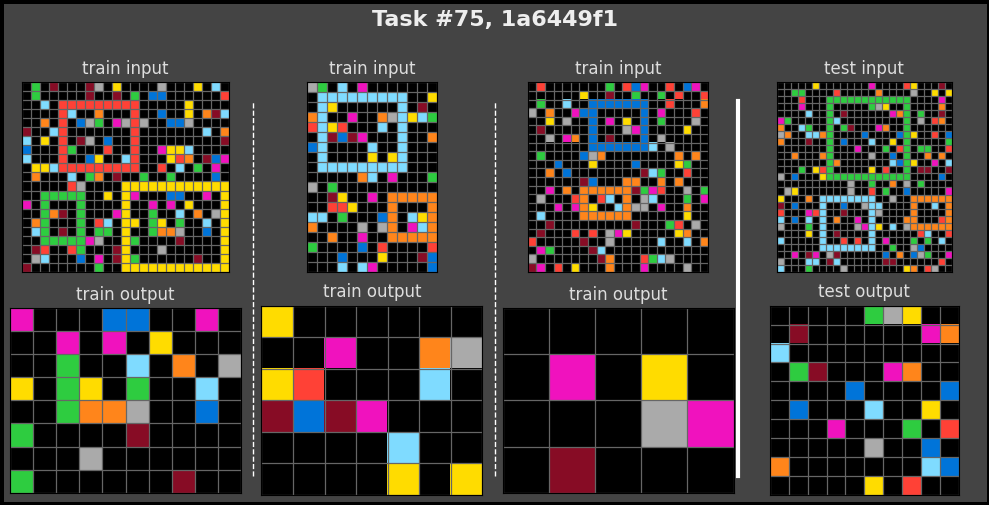

#76, 1acc24af


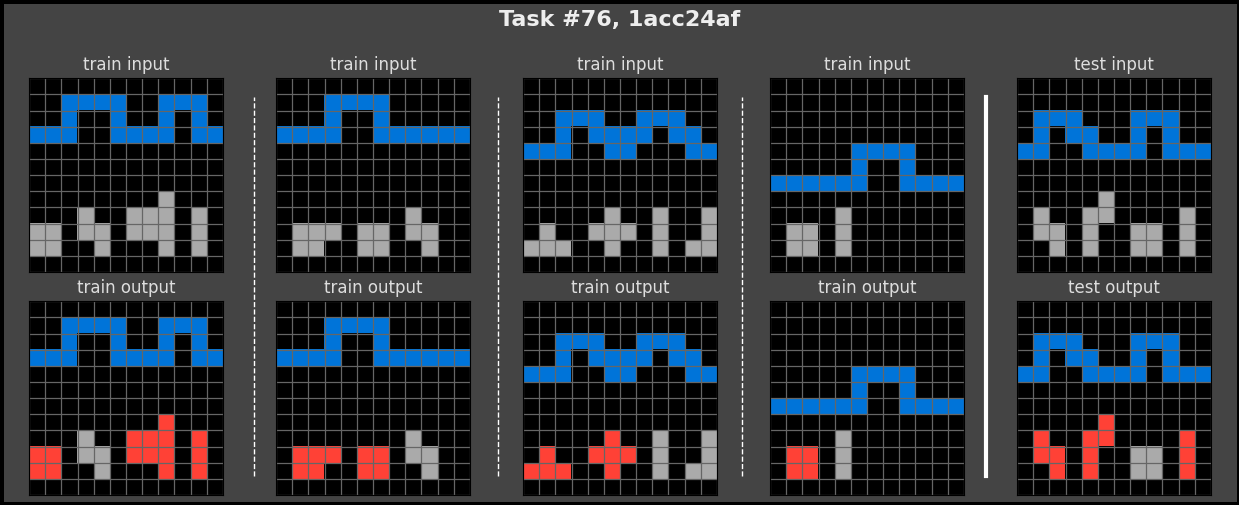

#77, 1b2d62fb


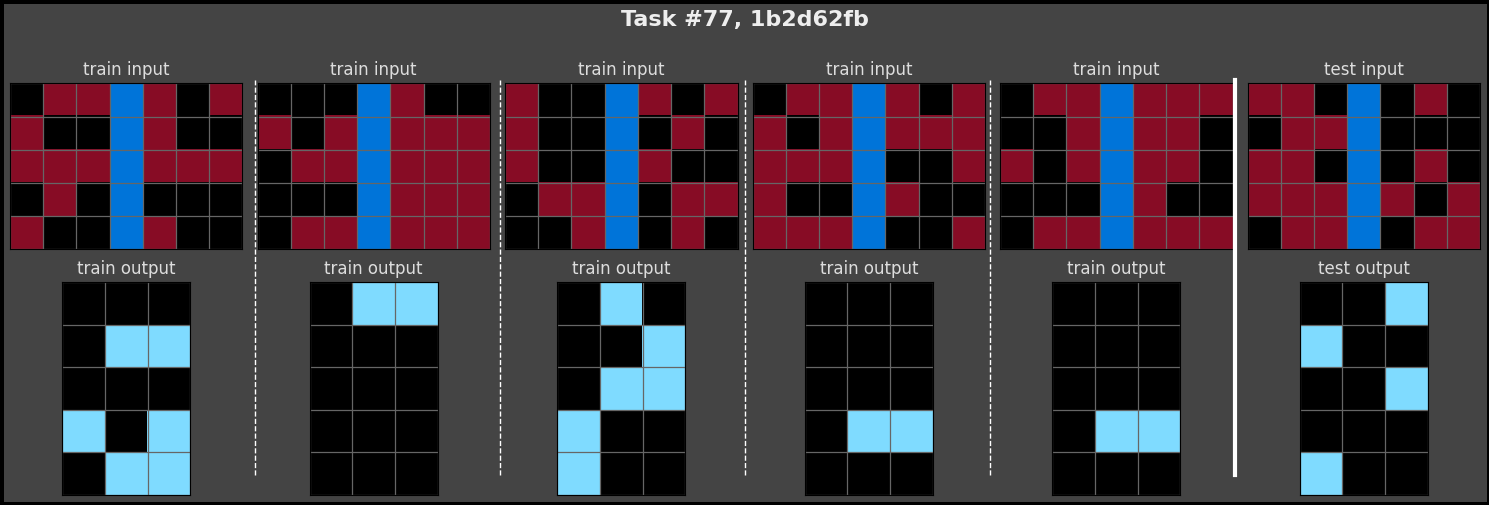

#78, 1b59e163


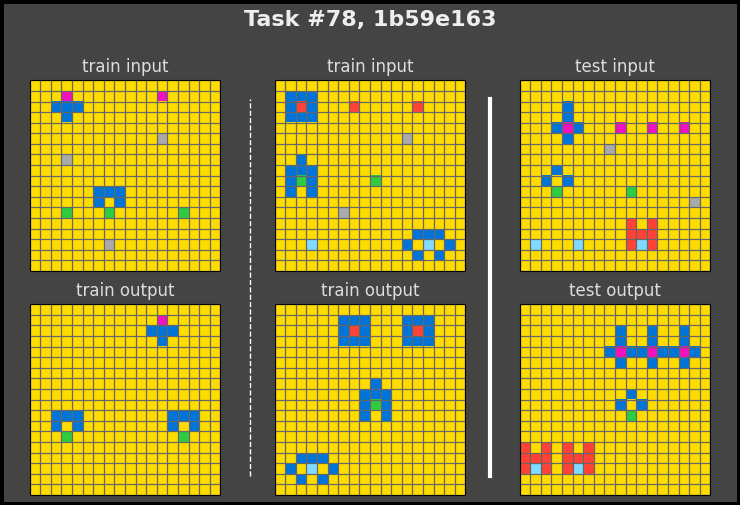

#79, 1b60fb0c


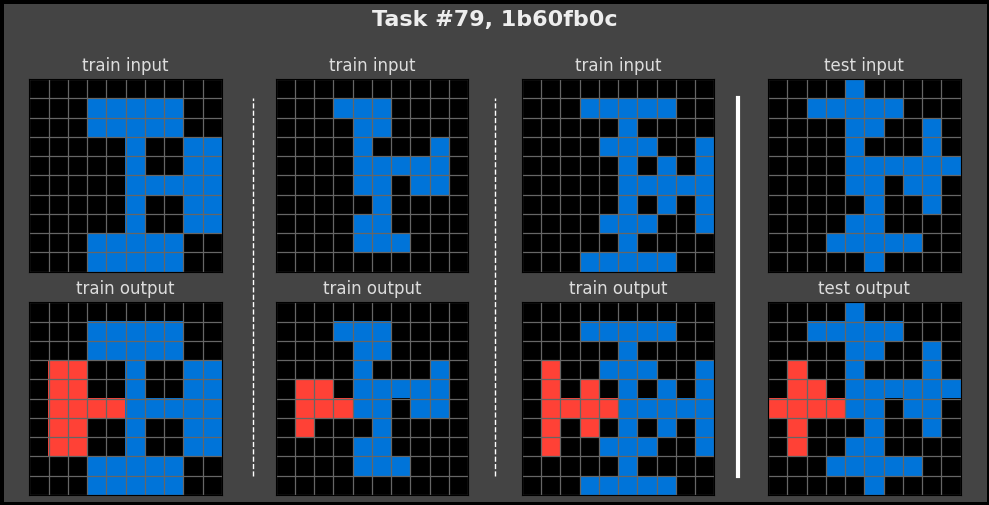

#80, 1b8318e3


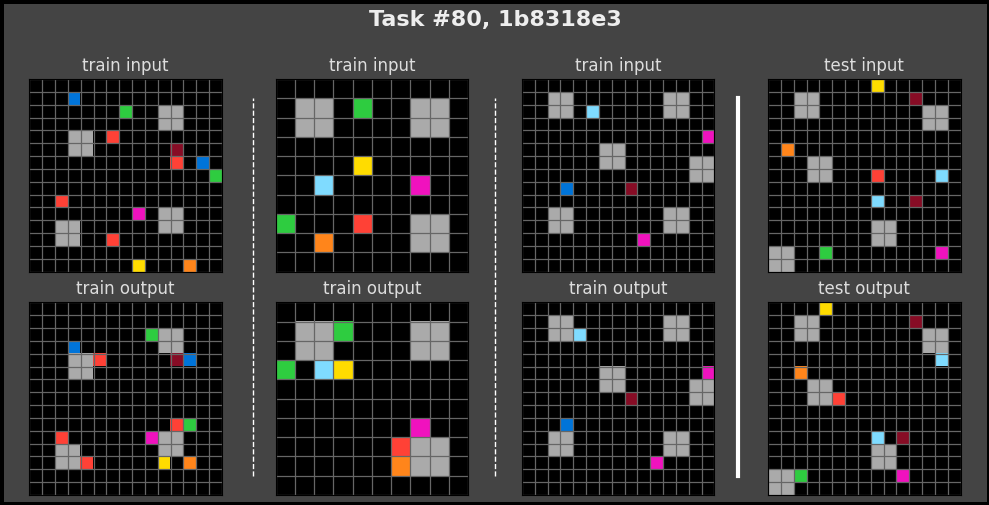

#81, 1be83260


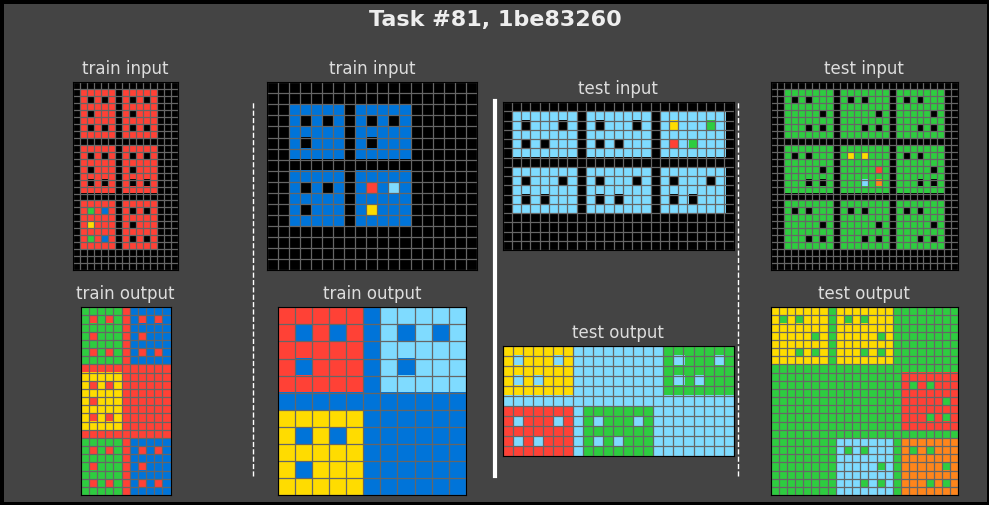

#82, 1bfc4729


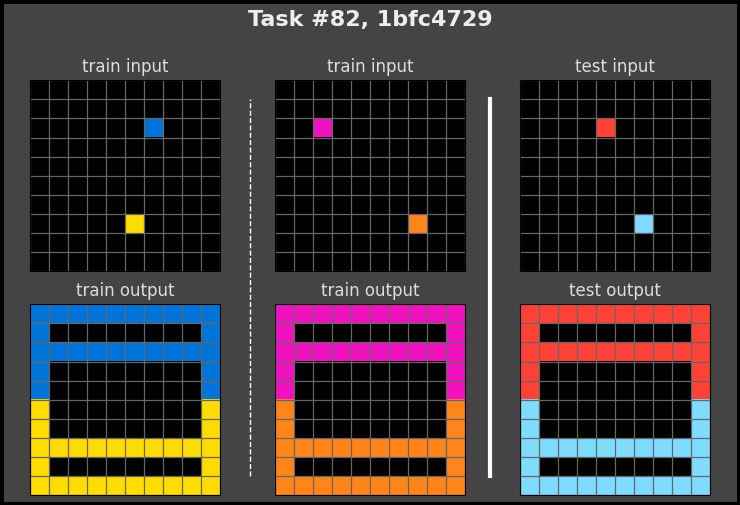

#83, 1c02dbbe


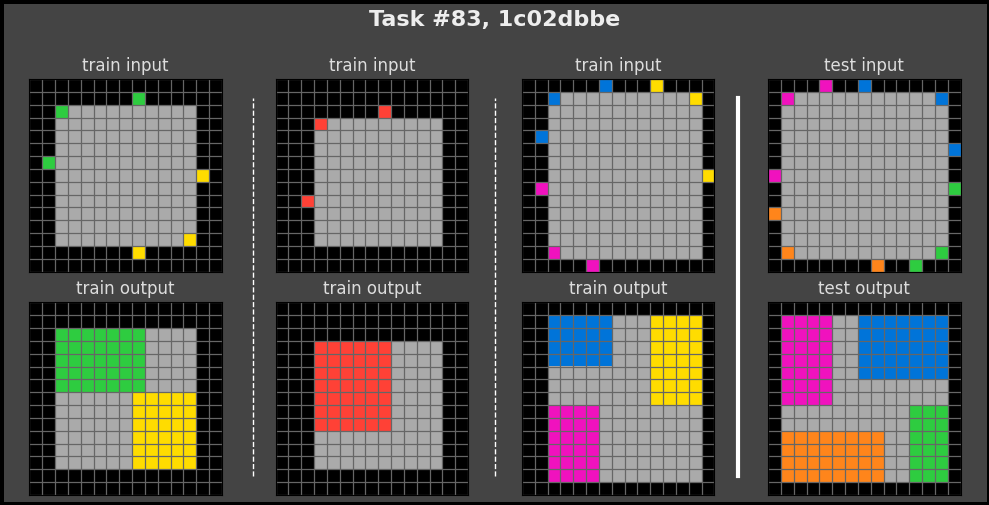

#84, 1c0d0a4b


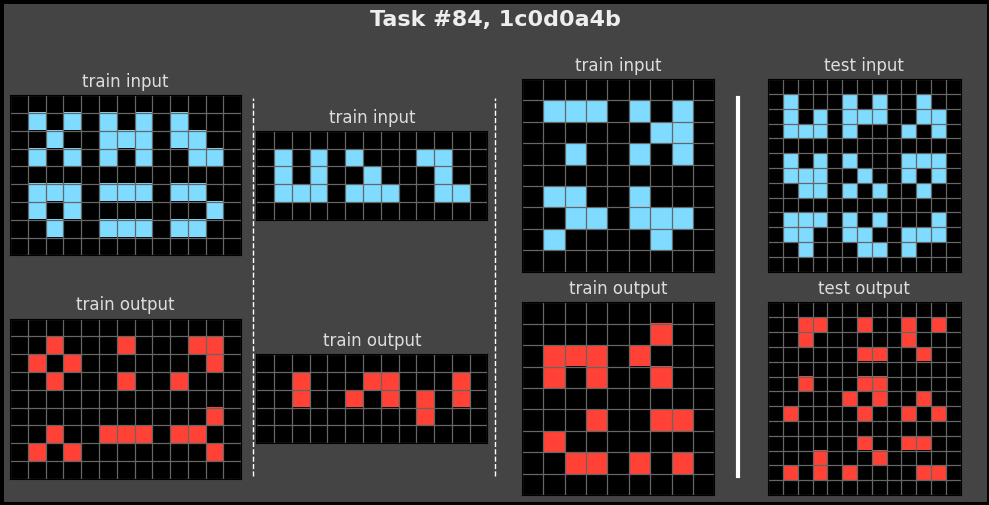

#85, 1c56ad9f


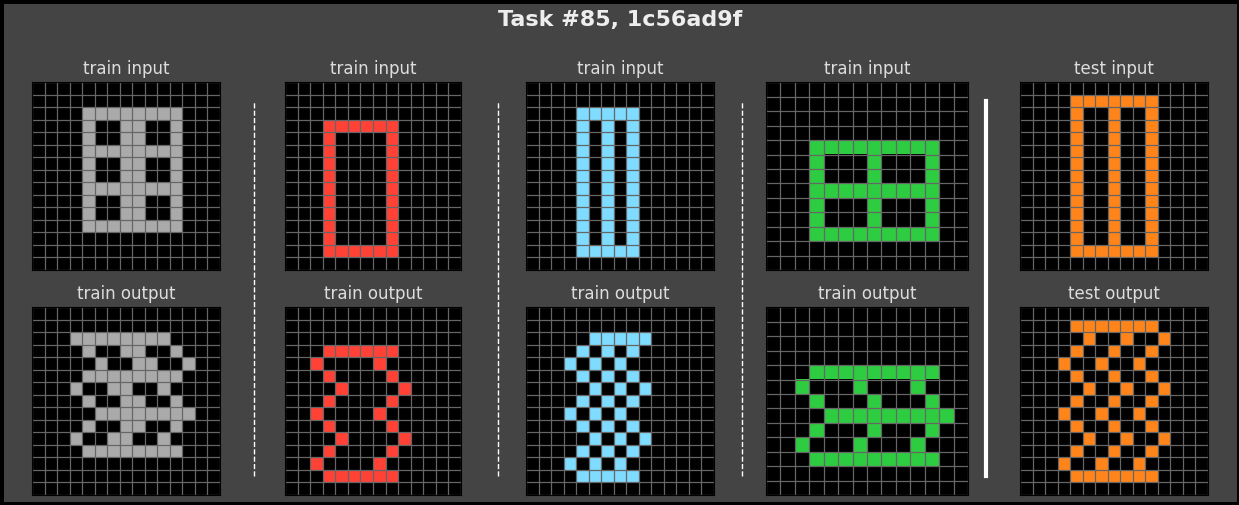

#86, 1c786137


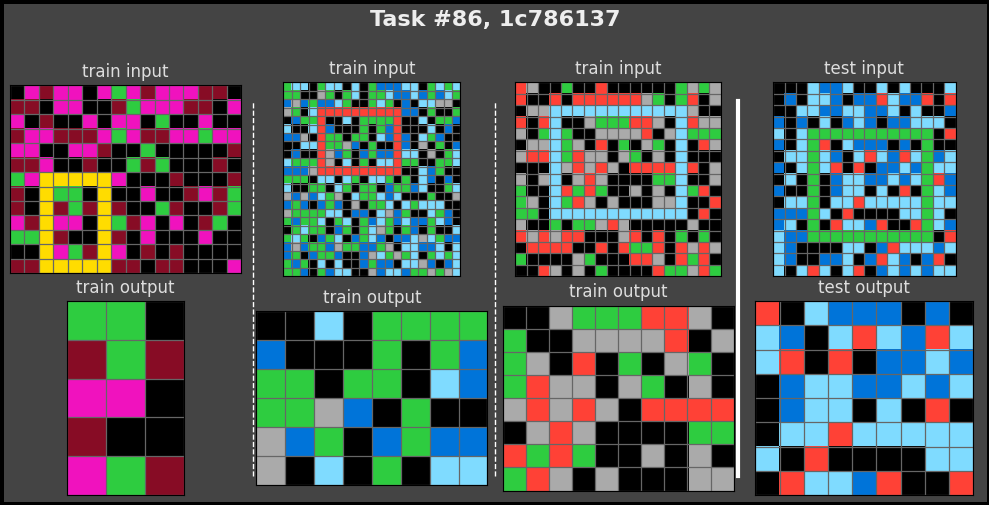

#87, 1caeab9d


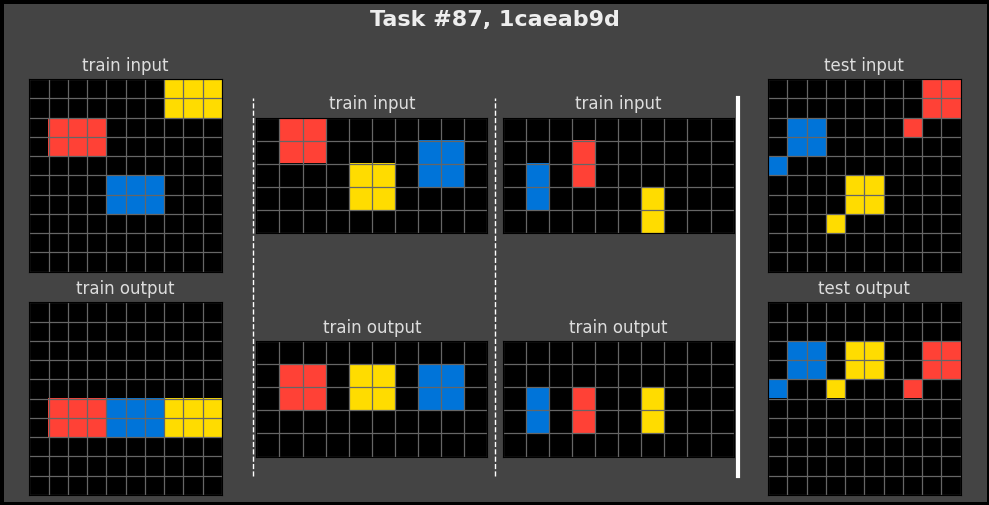

#88, 1cf80156


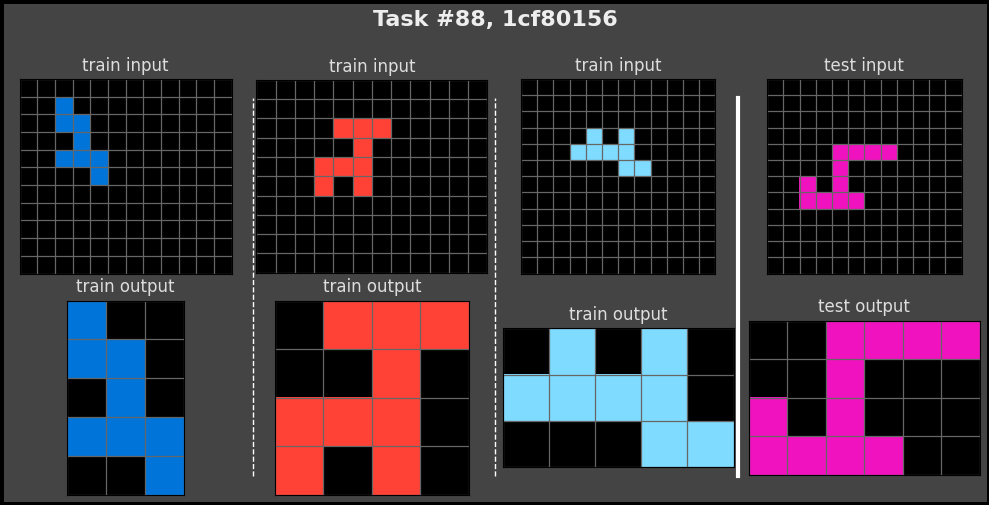

#89, 1d0a4b61


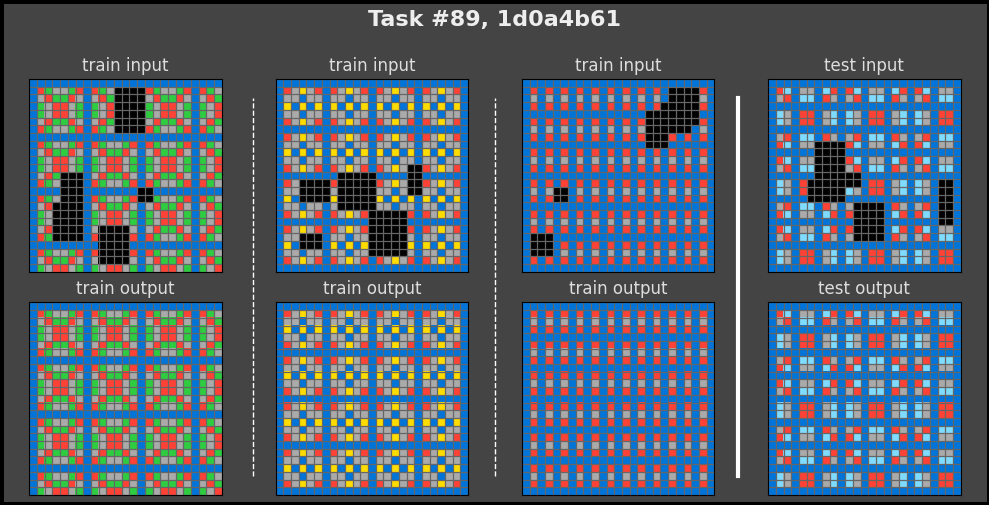

#90, 1d398264


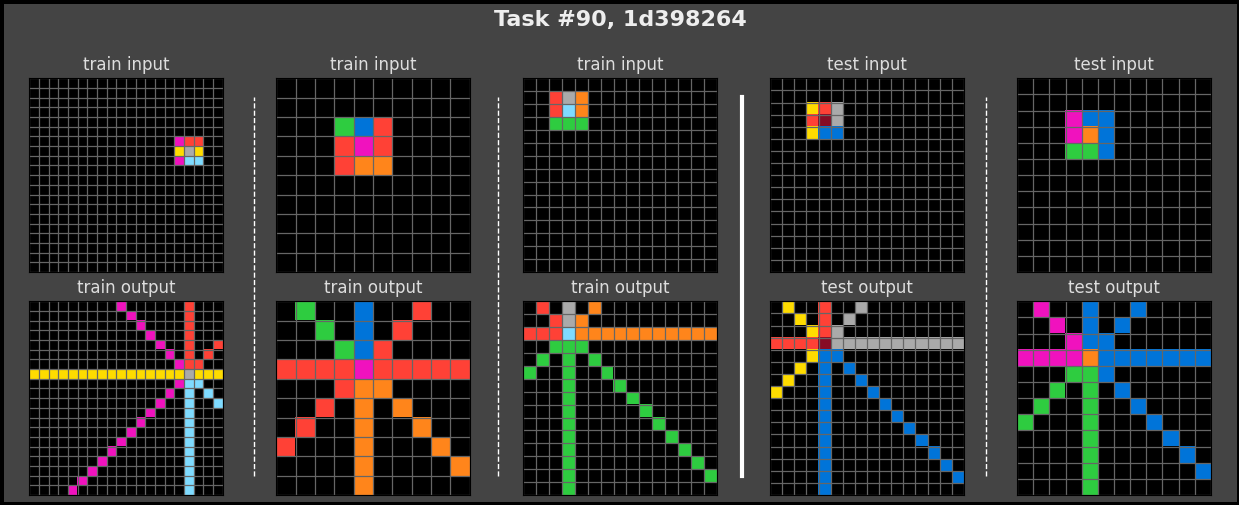

#91, 1d61978c


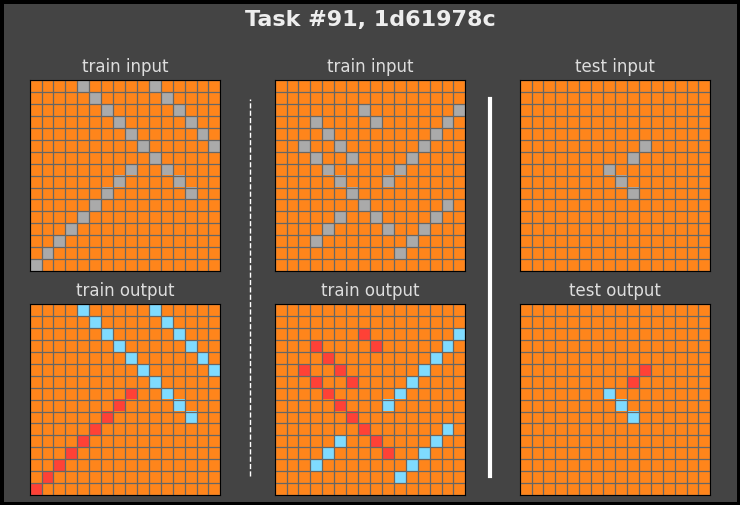

#92, 1da012fc


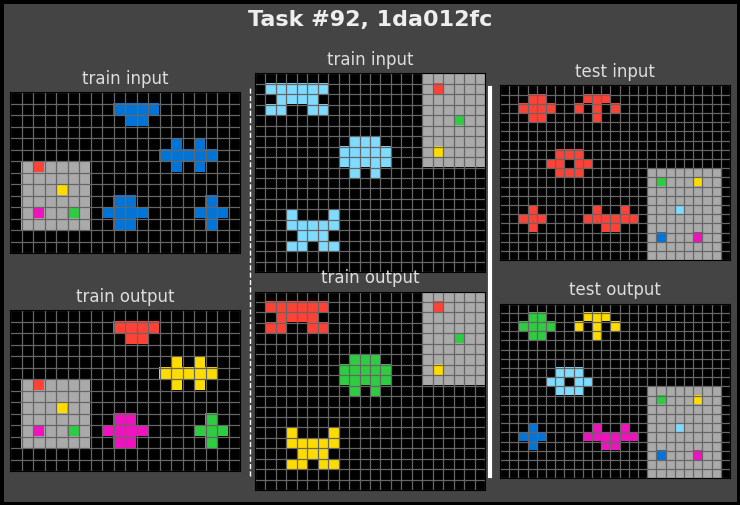

#93, 1e0a9b12


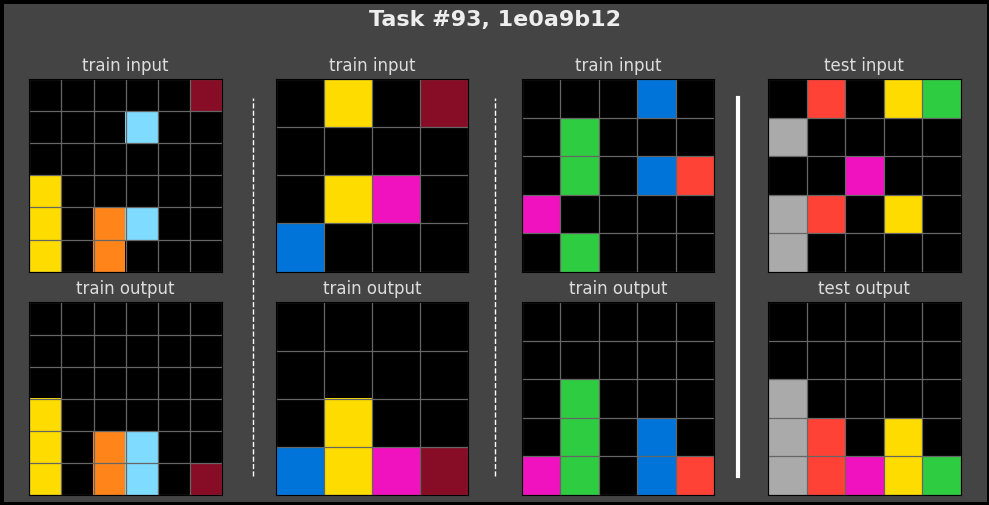

#94, 1e32b0e9


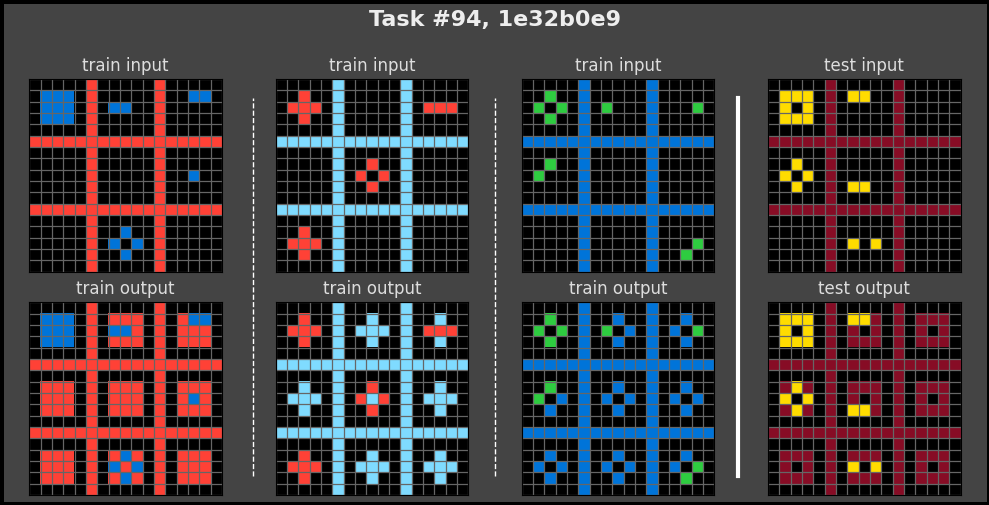

#95, 1e5d6875


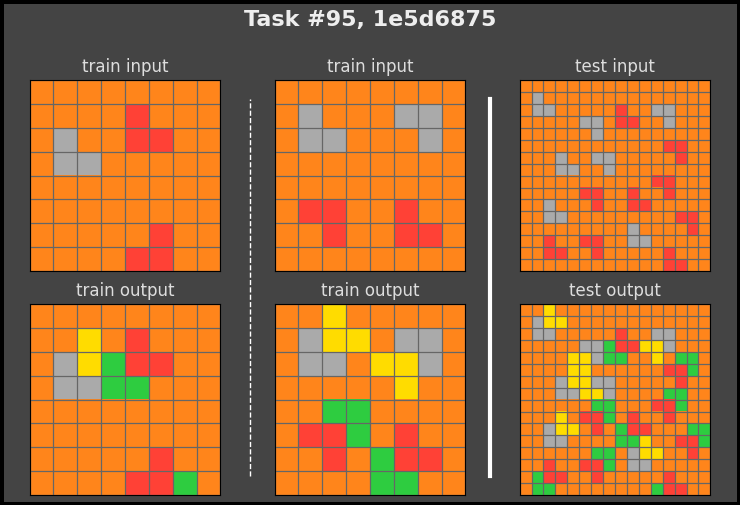

#96, 1e81d6f9


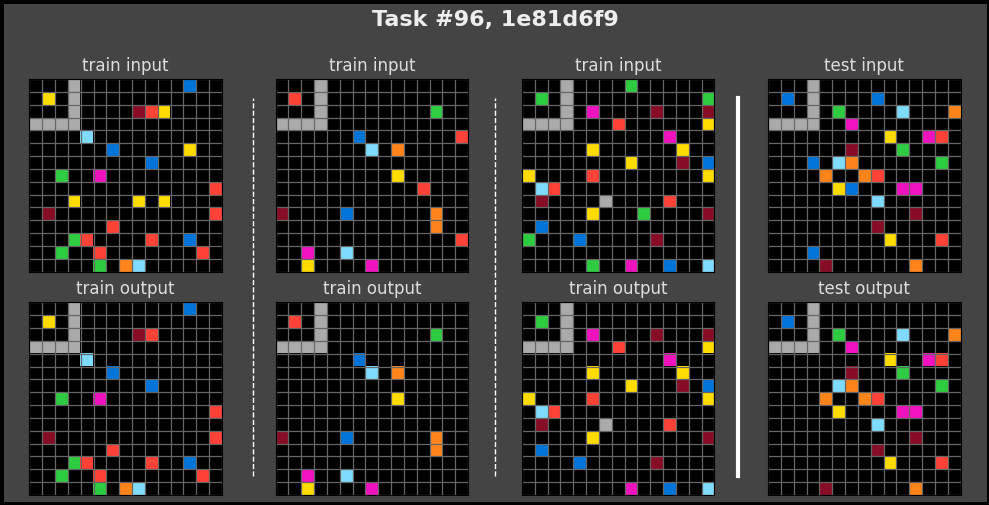

#97, 1efba499


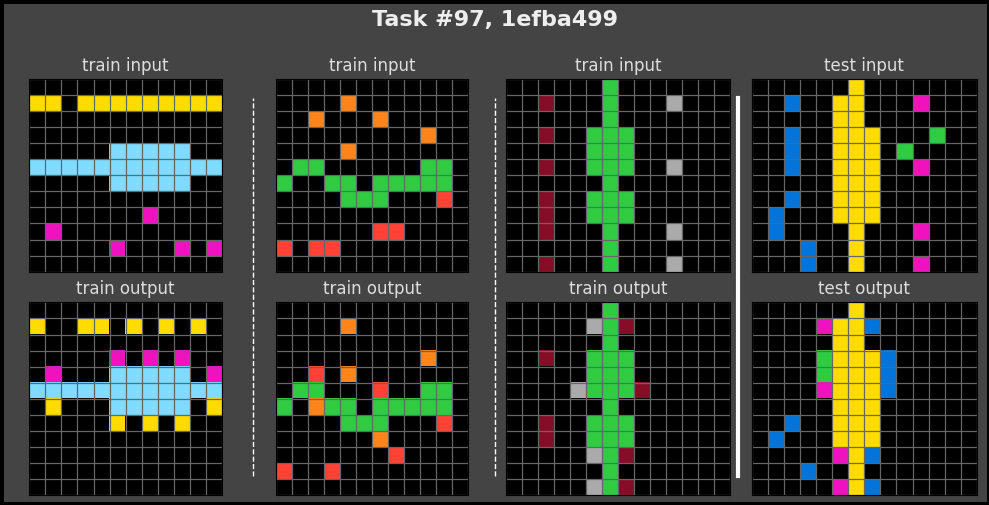

#98, 1f0c79e5


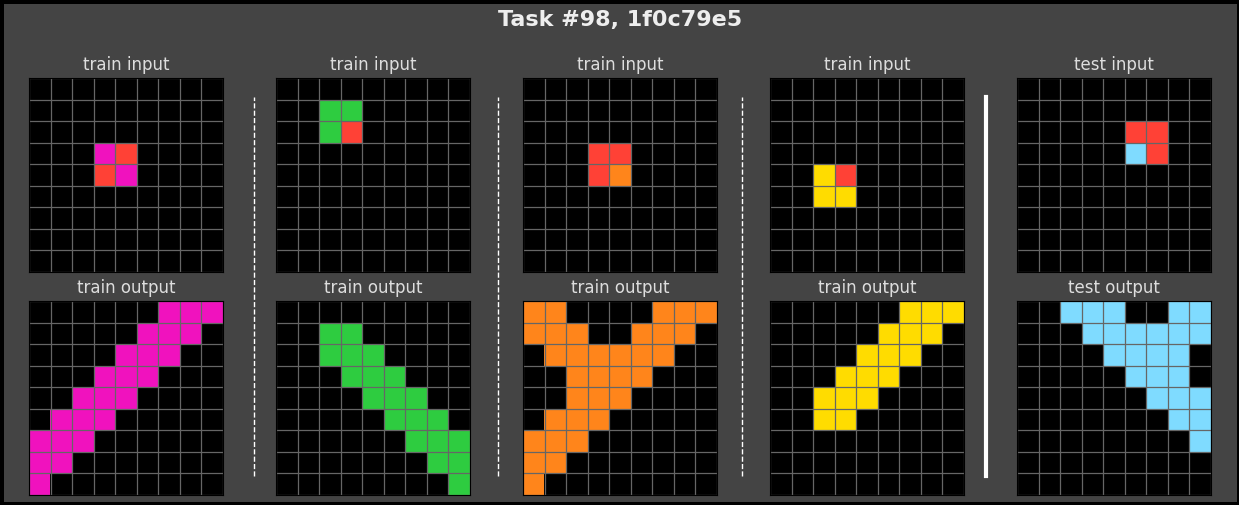

#99, 1f642eb9


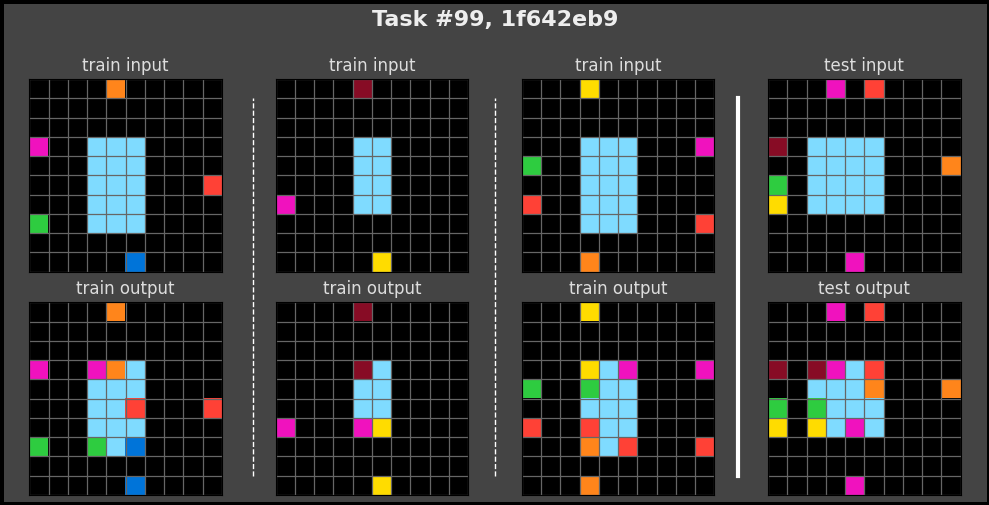

In [19]:
for i in range(0, 100):
    t=list(training_challenges)[i]
    task=training_challenges[t] 
    task_solution = training_solutions[t]
    plot_task(task,  task_solution, i, t)